Problem Statement
The problem statement is divided into two cases: 

Use Case A : To build a banking behavioural scorecard (model) for Self-employed customers which differentiates customer's risk profile. The scorecard will be built in unsecured disbursals.

The model will have the following usage -

Customer on-boarding for cross-selling other products of the bank.
It will help us decision customer treatment (through graded risk profile of  customer) as an input for credit underwriting.
What is a Banking Behavioural Scorecard (model)?

Banking Behavioural Scorecard is a scorecard (model) maintained for a customer based on his liability transactions. Liability transactions are transactions that are transacted by an internal customer of a bank i.e. a customer who has a current account (CA) or Savings account (SA) with the bank is an internal customer.

What do you mean by Self-employed customers?

Self-employed customers are non-salaried customers who have income coming from selfowned businesses i.e. Self-employed individuals, Proprietors, Private Ltd. Co. and Partnership Firms involved in the business of Manufacturing, Trading or Services.

How does a customer repay a loan?

Customer pays the loan in equal monthly instalments (EMIs). The loan will be paid through post-dated cheques. Customer also has an option to pay through Electronic Clearing System (ECS ) or a standing instruction to debit his HDFC Bank account with the EMI amount.

What security does a customer need to provide to obtain a Business loan?

To obtain the loan, there is absolutely no need to provide any security or collateral.

What are the loan tenure options for Business Loan?

A customer can repay his loan over a period of 12 to 48 months.

What does customer risk profile mean?

Customer risk profile means the probability of the customer defaulting on his EMI payment.

Use Case B : 

Describe your approach for the above built model and your reasons for the same
Describe model segmentation (if any)
Describe how will your model help the bank.
Data Desciption
The dataset consists of the following types of files :

AggregateData_Train/Test : Customer Savings account/Current Account transaction information for the training period.
TransactionData_Train/Test :  Type of transactions done by a particular customer, aggregated at customer level for relevant training period.
sample_submission.csv : Sample submission indicating the format of submission.
Columns description for the above mentioned files can be found in this excel sheet.

Agg Data Dic
V1	Disbursal End of month date
V2	ID
V3	Aggregated_Amount_Variable_1
V4	Aggregated_Amount_Variable_2
V5	Aggregated_Amount_Variable_3
V6	Aggregated_Amount_Variable_4
V7	Aggregated_Amount_Variable_5
V8	Aggregated_Amount_Variable_6
V9	Aggregated_Amount_Variable_7
V10	Aggregated_Amount_Variable_8
V11	Aggregated_Amount_Variable_9
V12	Aggregated_Amount_Variable_10
V13	Aggregated_Amount_Variable_11
V14	Aggregated_Amount_Variable_12
V15	Aggregated_Amount_Variable_13
V16	Aggregated_Amount_Variable_14
V17	Aggregated_Amount_Variable_15
V18	Aggregated_Amount_Variable_16
V19	Aggregated_Count_Variable_1
V20	Aggregated_Count_Variable_2
V21	Aggregated_Count_Variable_3
V22	Aggregated_Count_Variable_4
V23	Aggregated_Count_Variable_5
V24	Aggregated_Count_Variable_6
V25	Aggregated_Count_Variable_7
V26	Aggregated_Count_Variable_8
V27	Aggregated_Count_Variable_9
V28	Aggregated_Count_Variable_10
V29	Aggregated_Count_Variable_11
V30	Aggregated_Count_Variable_12
V31	Aggregated_Count_Variable_13
V32	Aggregated_Count_Variable_14
V33	Aggregated_Count_Variable_15
V34	Aggregated_Count_Variable_16
V35	Aggregated_Amount_Variable_17
V36	Aggregated_Amount_Variable_18
V37	Aggregated_Amount_Variable_19
V38	Aggregated_Count_Variable_17
V39	Aggregated_Count_Variable_18
V40	Aggregated_Count_Variable_19
V41	Aggregated_Ratio_Variable_1
V42	Aggregated_Ratio_Variable_2
V43	Aggregated_Proportion_Variable_1
V44	Aggregated_Proportion_Variable_2
V45	Aggregated_Proportion_Variable_3
V46	Aggregated_Proportion_Variable_4
V47	Aggregated_Proportion_Variable_5
V48	Aggregated_Proportion_Variable_6
V49	Aggregated_Proportion_Variable_7
V50	Aggregated_Count_Variable_20
V51	Aggregated_Count_Variable_21
V52	Aggregated_Count_Variable_22
V53	Aggregated_Count_Variable_23
bad_flag	Bad_Flag 

Transaction Data Dictionary
C2	ID
C3	Transaction ID
C4	The date of transaction
C5	Debit/ Credit Indicator
C6	Transaction Type
C8	Disbursal End of month date
C9	Transaction End of Month date
C10	Transaction Mnemonic which helps to identify the type of transaction eg. ATM/NEFT/RTGS etc
C12	Amount of transaction



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [6]:
# Load the training data
df_aggdata_train = pd.read_csv( 'C:/sandeep_operabackup/Analytics/HackerEarth/HDFC Credit Scoring/train_data/AggregateData_Train.csv' )

In [7]:
df_txndata_train = pd.read_csv('C:/sandeep_operabackup/Analytics/HackerEarth/HDFC Credit Scoring/train_data/TransactionData_Train.csv')

In [8]:
# Load the training data
df_aggdata_test = pd.read_csv( 'C:/sandeep_operabackup/Analytics/HackerEarth/HDFC Credit Scoring/test_data/AggregateData_Test.csv' )

In [9]:
df_txndata_test = pd.read_csv('C:/sandeep_operabackup/Analytics/HackerEarth/HDFC Credit Scoring/test_data/TransactionData_Test.csv')

In [10]:
#Check data for proper loading
df_aggdata_train.head(20)


,UID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V45,V46,V47,V48,V49,V50,V51,V52,V53,bad_flag
0,Tr-1,30SEP2038,61P4S1M3GET,10397.75,?,?,?,?,?,?,...,?,5.04055,?,?,?,6,9,3,10,0
1,Tr-2,31JAN2038,6NYVS1J3U7M,?,606.74,?,?,?,?,?,...,?,?,?,?,?,1,?,?,?,0
2,Tr-3,31APR2038,BLFB1KMS48,87452.89,963.52,?,?,13838,?,?,...,?,?,?,?,?,10,10,20,1,0
3,Tr-4,31NOV2038,MYGB1LCW8P,?,393.26,100000,?,?,?,?,...,?,?,?,?,?,4,1,?,2,0
4,Tr-5,31OCT2038,6UG5S1PQGE5,1100,497.2,?,?,?,?,0.9,...,?,0.00470,?,?,0.00007,2,3,1,2,0
5,Tr-6,31JUN2038,7UFB1CTP1I,60456,1936.07,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,0
6,Tr-7,31APR2038,56FB19KDG9,5194.84,112.36,?,?,?,?,?,...,?,?,?,?,?,1,1,?,20,0
7,Tr-8,31NOV2038,5UBB1BA9R7,?,337.08,295,?,?,?,?,...,?,?,?,?,?,2,2,?,2,0
8,Tr-9,30SEP2038,68CB11P3Q,?,876.4,?,?,?,?,?,...,?,?,?,?,?,1,10,?,?,0
9,Tr-10,30SEP2038,71BBS1MS4,?,?,?,?,?,?,?,...,?,?,?,?,?,2,1,?,1,0


In [11]:
df_txndata_train.head(20)

,C2,C3,C4,C5,C6,C8,C9,C10,C12
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,06JUL38:17:31:02,D,IAD,2038-12-30,30JUL38:00:00:00,OTHER,22000.00
1,9Y46ZBCWRP9,61CE41JD5YMP329,05MAY38:16:46:36,D,STD,2039-06-31,28MAY38:00:00:00,FT,8183.00
2,6Z4F3BPVME6,6UQA3CP9F95BOBD,08FEB37:15:55:28,C,OCD,2038-04-31,30FEB37:00:00:00,CHQ,48900.00
3,6UYF21TDMPPT,BZF6Z3AJQ55MAM,24NOV38:09:48:37,D,EAW,2039-05-29,31NOV38:00:00:00,ATM,1500.00
4,5N5ASLGMMPM,6IPA43AM4Y613SX,26OCT38:18:54:06,D,ATW,2038-03-31,31OCT38:00:00:00,ATM,10000.00
5,6UHVZCYQ56W,6UQA4KKDQ5THE2K,08SEP38:18:42:45,D,CHQ,2038-01-31,30SEP38:00:00:00,CHQ,7150.00
6,VXF63LKVFYG,6YPE3BJMFV91JQQ,31MAR37:14:25:19,C,STC,2039-04-31,31MAR37:00:00:00,FT,106459.00
7,6L4E3KCSR9WT,IX563OHVUE9E0S,15AUG38:12:25:26,D,CTD,2038-11-31,31AUG38:00:00:00,CHQ,8500.00
8,6U444CPWG8G7,6L4V4KPWG6W6O4Y,30SEP38:13:06:28,D,PDN,2039-04-31,30SEP38:00:00:00,OTHER,1016.26
9,6YQFDQJSR861,6NHF4QCMF99BCAD,26JUN38:08:27:17,D,CHQ,2038-11-31,31JUN38:00:00:00,CHQ,147485.00


In [12]:
df_txndata_test.head()

,C2,C3,C4,C5,C6,C8,C9,C10,C12
0,IYH6EOT91IN,6I5V3CKDUVTER3U,16JAN37:23:42:31,D,RDD,2038-02-30,31JAN37:00:00:00,SWEEP,1000.00
1,6NF44HKS8VNP,68BV39T3U86732X,01MAR37:10:24:25,D,NWD,2038-12-30,31MAR37:00:00:00,ATM,10000.00
2,6LFE2QYJ56TM,6UHW3BHJGEWE93X,23APR38:09:33:09,C,MCR,2038-07-30,31APR38:00:00:00,OTHER,23591.24
3,61QE4KT94V5N,6XBA4KPWF94NEBQ,30SEP38:17:30:56,D,ETD,2039-05-29,30SEP38:00:00:00,OTHER,24000.00
4,6XGA3KPVR7WH,5NFF4KADUV41J,23DEC37:19:37:08,C,OCD,2038-01-31,30DEC37:00:00:00,CHQ,4076.00


In [207]:
#get column info
df_aggdata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48434 entries, 0 to 48433
Data columns (total 38 columns):
UID    48434 non-null object
V1     48434 non-null object
V2     48434 non-null object
V3     20284 non-null float64
V4     38522 non-null float64
V6     2529 non-null float64
V7     3601 non-null float64
V8     63 non-null float64
V10    3367 non-null float64
V11    6187 non-null float64
V16    44599 non-null float64
V19    47995 non-null float64
V20    47995 non-null float64
V21    47995 non-null float64
V22    47995 non-null float64
V23    47995 non-null float64
V24    47995 non-null float64
V25    47995 non-null float64
V26    47995 non-null float64
V27    47995 non-null float64
V28    47995 non-null float64
V29    47995 non-null float64
V30    47995 non-null float64
V31    47995 non-null float64
V32    47995 non-null float64
V33    47995 non-null float64
V34    47995 non-null float64
V37    9492 non-null float64
V38    47995 non-null float64
V39    47995 non-null float64
V4

In [7]:
df_txndata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343745 entries, 0 to 3343744
Data columns (total 9 columns):
C2     object
C3     object
C4     object
C5     object
C6     object
C8     object
C9     object
C10    object
C12    float64
dtypes: float64(1), object(8)
memory usage: 229.6+ MB


In [14]:
#In Agg data, we can see a lot of missing values. Let us examine this further:
#Step 1: convert the required columns to numeric format: V3 to V53
#Step 2: carry out profiling of the variables 
#Step 3: Drop variables having fill-rate <5% or are highly co-related
#Step 4: Deal with skweness in variables
#Step 4: Treat missing values and outliers
#Step 5:WOE
#Store column names separately
cols=df_aggdata_train.columns
#Store numeric columns separately
cols_num=cols[3:len(cols)-1]
#Convert the required columns to numeric format
df_aggdata_train[cols_num]=df_aggdata_train[cols_num].apply(pd.to_numeric, errors='coerce')

In [15]:
df_aggdata_test[cols_num]=df_aggdata_test[cols_num].apply(pd.to_numeric,errors='coerce')

# Step1 and Step2

In [10]:
#Check for numeric conversion
df_aggdata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 55 columns):
UID         26775 non-null object
V1          26775 non-null object
V2          26775 non-null object
V3          10886 non-null float64
V4          21079 non-null float64
V5          755 non-null float64
V6          1360 non-null float64
V7          1940 non-null float64
V8          34 non-null float64
V9          406 non-null float64
V10         1805 non-null float64
V11         3351 non-null float64
V12         932 non-null float64
V13         886 non-null float64
V14         0 non-null float64
V15         836 non-null float64
V16         24308 non-null float64
V17         24012 non-null float64
V18         195 non-null float64
V19         26471 non-null float64
V20         26471 non-null float64
V21         26471 non-null float64
V22         26471 non-null float64
V23         26471 non-null float64
V24         26471 non-null float64
V25         26471 non-null float64
V26    

In [12]:
df_aggdata_test.head(10)

,UID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53
0,Te-1,30SEP2038,61P4S1M3GET,10397.75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.04055,NaN,NaN,NaN,6.0,9.0,3.0,10.0
1,Te-2,31JAN2038,6NYVS1J3U7M,NaN,606.74,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,Te-3,31APR2038,BLFB1KMS48,87452.89,963.52,NaN,NaN,13838.0,NaN,NaN,...,1.28678,NaN,NaN,NaN,NaN,NaN,10.0,10.0,20.0,1.0
3,Te-4,31NOV2038,MYGB1LCW8P,NaN,393.26,100000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,2.0
4,Te-5,31OCT2038,6UG5S1PQGE5,1100.00,497.20,NaN,NaN,NaN,NaN,0.9,...,NaN,NaN,0.00470,NaN,NaN,0.00007,2.0,3.0,1.0,2.0
5,Te-6,31JUN2038,7UFB1CTP1I,60456.00,1936.07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Te-7,31APR2038,56FB19KDG9,5194.84,112.36,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,20.0
7,Te-8,31NOV2038,5UBB1BA9R7,NaN,337.08,295.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,2.0
8,Te-9,30SEP2038,68CB11P3Q,NaN,876.40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,NaN,NaN
9,Te-10,30SEP2038,71BBS1MS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0


In [8]:
df_aggdata_train.head(20)

,UID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V45,V46,V47,V48,V49,V50,V51,V52,V53,bad_flag
0,Tr-1,30SEP2038,61P4S1M3GET,10397.75,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.04055,NaN,NaN,NaN,6.0,9.0,3.0,10.0,0
1,Tr-2,31JAN2038,6NYVS1J3U7M,NaN,606.74,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0
2,Tr-3,31APR2038,BLFB1KMS48,87452.89,963.52,NaN,NaN,13838.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,10.0,20.0,1.0,0
3,Tr-4,31NOV2038,MYGB1LCW8P,NaN,393.26,100000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,2.0,0
4,Tr-5,31OCT2038,6UG5S1PQGE5,1100.00,497.20,NaN,NaN,NaN,NaN,0.9,...,NaN,0.00470,NaN,NaN,0.00007,2.0,3.0,1.0,2.0,0
5,Tr-6,31JUN2038,7UFB1CTP1I,60456.00,1936.07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,Tr-7,31APR2038,56FB19KDG9,5194.84,112.36,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,20.0,0
7,Tr-8,31NOV2038,5UBB1BA9R7,NaN,337.08,295.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,2.0,0
8,Tr-9,30SEP2038,68CB11P3Q,NaN,876.40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,10.0,NaN,NaN,0
9,Tr-10,30SEP2038,71BBS1MS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,0


In [16]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isna().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [17]:

df_agg_summary=df_aggdata_train[cols_num].apply(lambda x: var_summary(x)).T

In [18]:
df_agg_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
V3,10886.0,15889.0,2.270516e+09,2.085721e+05,42617.480000,1.823981e+06,3.326907e+12,0.01000,110.000000,889.647500,2173.000000,10000.000000,42617.480000,1.300000e+05,3.178397e+05,5.476890e+05,2.153817e+06,1.329516e+08
V4,21079.0,5696.0,3.403413e+08,1.614599e+04,680.970000,1.079490e+06,1.165298e+12,0.87000,5.700000,28.500000,44.960000,194.290000,680.970000,1.874340e+03,4.029788e+03,7.849251e+03,9.593053e+04,1.545023e+08
V5,755.0,26020.0,4.891654e+08,6.479012e+05,48994.000000,2.253789e+06,5.079566e+12,13.03000,50.904000,240.000000,500.000000,2677.500000,48994.000000,2.670515e+05,1.316129e+06,3.197897e+06,1.058950e+07,3.280601e+07
V6,1360.0,25415.0,5.649734e+08,4.154216e+05,17987.000000,1.825001e+06,3.330627e+12,1.00000,229.880000,470.000000,500.000000,3000.000000,17987.000000,1.205768e+05,6.483194e+05,1.746918e+06,1.014911e+07,2.538500e+07
V7,1940.0,24835.0,4.464344e+07,2.301208e+04,3148.500000,1.792111e+05,3.211663e+10,7.42000,58.170000,203.816000,334.790000,857.180000,3148.500000,1.260075e+04,3.746615e+04,7.016005e+04,2.085797e+05,6.686034e+06
V8,34.0,26741.0,3.144293e+07,9.247922e+05,50931.500000,2.437085e+06,5.939383e+12,739.00000,841.630000,1069.500000,3180.000000,8601.000000,50931.500000,3.039672e+05,2.692755e+06,4.474250e+06,1.036100e+07,1.282665e+07
V9,406.0,26369.0,3.362700e+07,8.282512e+04,2151.000000,4.212761e+05,1.774735e+11,0.90000,0.900000,1.065000,1.805000,6.172500,2151.000000,2.175025e+04,1.551710e+05,2.977532e+05,1.811141e+06,6.918710e+06
V10,1805.0,24970.0,1.088100e+09,6.028255e+05,51643.000000,3.306344e+06,1.093191e+13,0.01000,2.043600,140.122000,780.000000,7620.000000,51643.000000,2.544820e+05,1.008301e+06,2.174396e+06,8.926432e+06,7.732733e+07
V11,3351.0,23424.0,6.027180e+08,1.798621e+05,10900.000000,2.900429e+06,8.412490e+12,0.01000,500.000000,1000.000000,2000.000000,5000.000000,10900.000000,3.000000e+04,1.137990e+05,2.984460e+05,2.627446e+06,1.556410e+08
V12,932.0,25843.0,1.010584e+09,1.084318e+06,200000.000000,3.244636e+06,1.052766e+13,1.00000,36.550000,622.000000,8789.200000,49444.982500,200000.000000,8.500000e+05,2.597334e+06,4.222500e+06,1.237491e+07,5.000000e+07


In [69]:
df_agg_summary.to_csv("C:/sandeep_operabackup/Analytics/HackerEarth/HDFC Credit Scoring/AggdataEDD0911.csv")

In [43]:
#Create profiling
profile_aggdata_train=pandas_profiling.ProfileReport(df_aggdata_train)

In [35]:
#Detailed profiling using pandas profiling
profile_aggdata_train.to_file(outputfile="C:/sandeep_operabackup/Analytics/HackerEarth/HDFC Credit Scoring/AggdataProfileSummary0911.html")

In [19]:
#save training dataset before further manipulations
df_aggdata_train_original = df_aggdata_train
#df_aggdata_train = df_aggdata_train_original

In [20]:
#Based on profiling, drop variables where fill-rate <5% or if variable is highly co-related
var_to_drop= ['V12','V13','V14','V15','V17','V18','V35','V36','V42','V44','V45','V47','V48','V49','V5','V9']

In [21]:
df_aggdata_train=df_aggdata_train.drop(var_to_drop,axis=1)

In [22]:
df_aggdata_test=df_aggdata_test.drop(var_to_drop,axis=1)

In [23]:
df_aggdata_train['UID'].nunique()

26775

In [ ]:
skewed_vars = ['V11','V16','V21','V22','V24','V25','V26','V27','V28','V3','V31','V33','V34','V37','V38','V4','V50','V7']

In [24]:
df_aggdata_train.isnull().sum()

UID             0
V1              0
V2              0
V3          15889
V4           5696
V6          25415
V7          24835
V8          26741
V10         24970
V11         23424
V16          2467
V19           304
V20           304
V21           304
V22           304
V23           304
V24           304
V25           304
V26           304
V27           304
V28           304
V29           304
V30           304
V31           304
V32           304
V33           304
V34           304
V37         21679
V38           304
V39           304
V40           304
V41         26206
V43          5696
V46         21679
V50         13839
V51         12090
V52         16423
V53         12294
bad_flag        0
dtype: int64

In [25]:
#Outlier and missing value treatment for all numeric vars
df_aggdata_train_num = df_aggdata_train.drop(['UID','V1','V2','bad_flag'],axis=1)

In [26]:
df_aggdata_test_num = df_aggdata_test.drop(['UID','V1','V2'],axis=1)

In [27]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

df_aggdata_train_num=df_aggdata_train_num.apply(lambda x: outlier_capping(x))
df_aggdata_test_num=df_aggdata_test_num.apply(lambda x: outlier_capping(x))

In [28]:
#check num var after outlier treatment
df_agg_summary=df_aggdata_train_num.apply(lambda x: var_summary(x)).T

In [76]:
df_agg_summary.to_csv("C:/sandeep_operabackup/Analytics/HackerEarth/HDFC Credit Scoring/AggdataNumEDD1011.csv")

In [29]:
#Handling missings values
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

df_aggdata_train_num=df_aggdata_train_num.apply(lambda x: Missing_imputation(x))
df_aggdata_test_num=df_aggdata_test_num.apply(lambda x: Missing_imputation(x))

In [30]:
#check num var after missing value treatment
df_agg_summary=df_aggdata_train_num.apply(lambda x: var_summary(x)).T
#df_agg_summary.to_csv("C:/sandeep_operabackup/Analytics/HackerEarth/HDFC Credit Scoring/AggdataNum_MissingEDD1011.csv")

In [79]:
#Create profiling data check
#Create profiling
profile_aggdata_train_num=pandas_profiling.ProfileReport(df_aggdata_train_num)

In [80]:
#Detailed profiling using pandas profiling
profile_aggdata_train_num.to_file(outputfile="C:/sandeep_operabackup/Analytics/HackerEarth/HDFC Credit Scoring/AggdataNumProfileSummary1011.html")

In [31]:
#From the profile data, we can see that V24,V30 and V34 can be rejected as all have constant 0 value
df_aggdata_train_num_original=df_aggdata_train_num
df_aggdata_test_num_original=df_aggdata_test_num

In [32]:
df_aggdata_train_num=df_aggdata_train_num.drop(['V24','V30','V34'],axis=1)

In [33]:
df_aggdata_test_num=df_aggdata_test_num.drop(['V24','V30','V34'],axis=1)

In [34]:
df_aggdata_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 32 columns):
V3     26775 non-null float64
V4     26775 non-null float64
V6     26775 non-null float64
V7     26775 non-null float64
V8     26775 non-null float64
V10    26775 non-null float64
V11    26775 non-null float64
V16    26775 non-null float64
V19    26775 non-null float64
V20    26775 non-null float64
V21    26775 non-null float64
V22    26775 non-null float64
V23    26775 non-null float64
V25    26775 non-null float64
V26    26775 non-null float64
V27    26775 non-null float64
V28    26775 non-null float64
V29    26775 non-null float64
V31    26775 non-null float64
V32    26775 non-null float64
V33    26775 non-null float64
V37    26775 non-null float64
V38    26775 non-null float64
V39    26775 non-null float64
V40    26775 non-null float64
V41    26775 non-null float64
V43    26775 non-null float64
V46    26775 non-null float64
V50    26775 non-null float64
V51    26775 non-null

In [35]:

df_aggdata_train_count = df_aggdata_train_num.drop(['V3','V4','V6','V7','V8','V10','V11','V16','V37','V41','V43','V46'],axis=1)

In [36]:
df_aggdata_test_count = df_aggdata_test_num.drop(['V3','V4','V6','V7','V8','V10','V11','V16','V37','V41','V43','V46'],axis=1)

In [37]:
quantile_list = [0, .25, .5, .75, 1.0]
df_quantile=(df_aggdata_train_count.quantile(quantile_list))

In [38]:
df_quantile_test=(df_aggdata_test_count.quantile(quantile_list))

In [30]:
df_quantile.reset_index(drop=True, inplace=False)

,V19,V20,V21,V22,V23,V25,V26,V27,V28,V29,V31,V32,V33,V38,V39,V40,V50,V51,V52,V53
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.00000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,0.0,0.0,2.000000,2.000000,6.000000,2.00000
2,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,21.0,0.0,0.0,0.0,5.538343,6.356078,8.320421,7.27581
3,5.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,48.5,0.0,0.0,0.0,5.538343,6.356078,8.320421,7.27581
4,53.3,75.0,3.0,4.0,9.0,1.0,8.0,17.0,3.0,5.0,2.0,399.3,434.6,2.0,1.0,34.0,56.000000,77.000000,92.000000,84.00000


In [ ]:
df_quantile['V20'].head()

In [ ]:
df_aggdata_train_count['V32'].head()

In [39]:
#bucekting
df_aggdata_train_count['V19_Bin'] = df_aggdata_train_count['V19'].apply(lambda x: 0 if 0 <= x < 5 else 1)
df_aggdata_train_count['V20_Bin'] = df_aggdata_train_count['V20'].apply(lambda x: 0 if 0 <= x < 4 else 1)
df_aggdata_train_count['V21_Bin'] = df_aggdata_train_count['V21'].apply(lambda x: 0 if 0 <= x < 3 else 1)
df_aggdata_train_count['V22_Bin'] = df_aggdata_train_count['V22'].apply(lambda x: 0 if 0 <= x < 4 else 1)
df_aggdata_train_count['V23_Bin'] = df_aggdata_train_count['V23'].apply(lambda x: 0 if 0 <= x < 9 else 1)
df_aggdata_train_count['V25_Bin'] = df_aggdata_train_count['V25'].apply(lambda x: 0 if 0 <= x < 1 else 1)
df_aggdata_train_count['V26_Bin'] = df_aggdata_train_count['V26'].apply(lambda x: 0 if 0 <= x < 8 else 1)
df_aggdata_train_count['V27_Bin'] = df_aggdata_train_count['V27'].apply(lambda x: 0 if 0 <= x < 17 else 1)
df_aggdata_train_count['V28_Bin'] = df_aggdata_train_count['V28'].apply(lambda x: 0 if 0 <= x < 3 else 1)
df_aggdata_train_count['V29_Bin'] = df_aggdata_train_count['V29'].apply(lambda x: 0 if 0 <= x < 5 else 1)
df_aggdata_train_count['V31_Bin'] = df_aggdata_train_count['V31'].apply(lambda x: 0 if 0 <= x < 2 else 1)
df_aggdata_train_count['V38_Bin'] = df_aggdata_train_count['V38'].apply(lambda x: 0 if 0 <= x < 2 else 1)
df_aggdata_train_count['V39_Bin'] = df_aggdata_train_count['V39'].apply(lambda x: 0 if 0 <= x < 1 else 1)
df_aggdata_train_count['V40_Bin'] = df_aggdata_train_count['V40'].apply(lambda x: 0 if 0 <= x < 34 else 1)
df_aggdata_train_count['V50_Bin'] = df_aggdata_train_count['V50'].apply(lambda x: 0 if 0 <= x < 6 else 1)
df_aggdata_train_count['V51_Bin'] = df_aggdata_train_count['V51'].apply(lambda x: 0 if 0 <= x < 7 else 1)
df_aggdata_train_count['V52_Bin'] = df_aggdata_train_count['V52'].apply(lambda x: 0 if 0 <= x < 9 else 1)
df_aggdata_train_count['V53_Bin'] = df_aggdata_train_count['V53'].apply(lambda x: 0 if 0 <= x < 8 else 1)

In [40]:
#bucekting
df_aggdata_test_count['V19_Bin'] = df_aggdata_test_count['V19'].apply(lambda x: 0 if 0 <= x < 5 else 1)
df_aggdata_test_count['V20_Bin'] = df_aggdata_test_count['V20'].apply(lambda x: 0 if 0 <= x < 4 else 1)
df_aggdata_test_count['V21_Bin'] = df_aggdata_test_count['V21'].apply(lambda x: 0 if 0 <= x < 3 else 1)
df_aggdata_test_count['V22_Bin'] = df_aggdata_test_count['V22'].apply(lambda x: 0 if 0 <= x < 4 else 1)
df_aggdata_test_count['V23_Bin'] = df_aggdata_test_count['V23'].apply(lambda x: 0 if 0 <= x < 9 else 1)
df_aggdata_test_count['V25_Bin'] = df_aggdata_test_count['V25'].apply(lambda x: 0 if 0 <= x < 1 else 1)
df_aggdata_test_count['V26_Bin'] = df_aggdata_test_count['V26'].apply(lambda x: 0 if 0 <= x < 8 else 1)
df_aggdata_test_count['V27_Bin'] = df_aggdata_test_count['V27'].apply(lambda x: 0 if 0 <= x < 17 else 1)
df_aggdata_test_count['V28_Bin'] = df_aggdata_test_count['V28'].apply(lambda x: 0 if 0 <= x < 3 else 1)
df_aggdata_test_count['V29_Bin'] = df_aggdata_test_count['V29'].apply(lambda x: 0 if 0 <= x < 5 else 1)
df_aggdata_test_count['V31_Bin'] = df_aggdata_test_count['V31'].apply(lambda x: 0 if 0 <= x < 2 else 1)
df_aggdata_test_count['V38_Bin'] = df_aggdata_test_count['V38'].apply(lambda x: 0 if 0 <= x < 2 else 1)
df_aggdata_test_count['V39_Bin'] = df_aggdata_test_count['V39'].apply(lambda x: 0 if 0 <= x < 1 else 1)
df_aggdata_test_count['V40_Bin'] = df_aggdata_test_count['V40'].apply(lambda x: 0 if 0 <= x < 34 else 1)
df_aggdata_test_count['V50_Bin'] = df_aggdata_test_count['V50'].apply(lambda x: 0 if 0 <= x < 6 else 1)
df_aggdata_test_count['V51_Bin'] = df_aggdata_test_count['V51'].apply(lambda x: 0 if 0 <= x < 7 else 1)
df_aggdata_test_count['V52_Bin'] = df_aggdata_test_count['V52'].apply(lambda x: 0 if 0 <= x < 9 else 1)
df_aggdata_test_count['V53_Bin'] = df_aggdata_test_count['V53'].apply(lambda x: 0 if 0 <= x < 8 else 1)

In [41]:
#for the remaining vars, we will use quantile bucketing
#We are now left with total of 32 vars, out of which 9 are amounts, 20 are counts and 3 are ratio/proportion vars
#Raw count values do not make much sense, hence will use binning technique to put these vars into bins
#We will use quartile based adaptive binning approach

def binning_var(x):
    quantile_list = [0, .25, .5, .75, 1.0]
    quantile_labels = [0,1,2,3]
    x_header = list(x)
    x= pd.qcut(x,q=4,labels=quantile_labels,duplicates='drop')
    return(x)

In [42]:
df_aggdata_train_count['V32_Bin']=binning_var(df_aggdata_train_count['V32'])
df_aggdata_train_count['V33_Bin']=binning_var(df_aggdata_train_count['V33'])

In [43]:
df_aggdata_test_count['V32_Bin']=binning_var(df_aggdata_test_count['V32'])
df_aggdata_test_count['V33_Bin']=binning_var(df_aggdata_test_count['V33'])

In [36]:
df_aggdata_train_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 40 columns):
V19        26775 non-null float64
V20        26775 non-null float64
V21        26775 non-null float64
V22        26775 non-null float64
V23        26775 non-null float64
V25        26775 non-null float64
V26        26775 non-null float64
V27        26775 non-null float64
V28        26775 non-null float64
V29        26775 non-null float64
V31        26775 non-null float64
V32        26775 non-null float64
V33        26775 non-null float64
V38        26775 non-null float64
V39        26775 non-null float64
V40        26775 non-null float64
V50        26775 non-null float64
V51        26775 non-null float64
V52        26775 non-null float64
V53        26775 non-null float64
V19_Bin    26775 non-null int64
V20_Bin    26775 non-null int64
V21_Bin    26775 non-null int64
V22_Bin    26775 non-null int64
V23_Bin    26775 non-null int64
V25_Bin    26775 non-null int64
V26_Bin    26775 no

In [44]:
#Merge the bins to agg train dataset
df_aggdata_train_count1=df_aggdata_train_count.drop(df_aggdata_train_count.columns[0:20],axis=1)

In [45]:
df_aggdata_test_count1=df_aggdata_test_count.drop(df_aggdata_test_count.columns[0:20],axis=1)

In [39]:
df_aggdata_train_count1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 20 columns):
V19_Bin    26775 non-null int64
V20_Bin    26775 non-null int64
V21_Bin    26775 non-null int64
V22_Bin    26775 non-null int64
V23_Bin    26775 non-null int64
V25_Bin    26775 non-null int64
V26_Bin    26775 non-null int64
V27_Bin    26775 non-null int64
V28_Bin    26775 non-null int64
V29_Bin    26775 non-null int64
V31_Bin    26775 non-null int64
V38_Bin    26775 non-null int64
V39_Bin    26775 non-null int64
V40_Bin    26775 non-null int64
V50_Bin    26775 non-null int64
V51_Bin    26775 non-null int64
V52_Bin    26775 non-null int64
V53_Bin    26775 non-null int64
V32_Bin    26775 non-null category
V33_Bin    26775 non-null category
dtypes: category(2), int64(18)
memory usage: 3.7 MB


In [46]:
#create dummy vars for each bin
df_aggdata_train_count2=pd.get_dummies(df_aggdata_train_count1)

In [47]:
df_aggdata_test_count2=pd.get_dummies(df_aggdata_test_count1)

In [42]:
df_aggdata_train_count1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 20 columns):
V19_Bin    26775 non-null int64
V20_Bin    26775 non-null int64
V21_Bin    26775 non-null int64
V22_Bin    26775 non-null int64
V23_Bin    26775 non-null int64
V25_Bin    26775 non-null int64
V26_Bin    26775 non-null int64
V27_Bin    26775 non-null int64
V28_Bin    26775 non-null int64
V29_Bin    26775 non-null int64
V31_Bin    26775 non-null int64
V38_Bin    26775 non-null int64
V39_Bin    26775 non-null int64
V40_Bin    26775 non-null int64
V50_Bin    26775 non-null int64
V51_Bin    26775 non-null int64
V52_Bin    26775 non-null int64
V53_Bin    26775 non-null int64
V32_Bin    26775 non-null category
V33_Bin    26775 non-null category
dtypes: category(2), int64(18)
memory usage: 3.7 MB


In [43]:
df_aggdata_train_count2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 26 columns):
V19_Bin      26775 non-null int64
V20_Bin      26775 non-null int64
V21_Bin      26775 non-null int64
V22_Bin      26775 non-null int64
V23_Bin      26775 non-null int64
V25_Bin      26775 non-null int64
V26_Bin      26775 non-null int64
V27_Bin      26775 non-null int64
V28_Bin      26775 non-null int64
V29_Bin      26775 non-null int64
V31_Bin      26775 non-null int64
V38_Bin      26775 non-null int64
V39_Bin      26775 non-null int64
V40_Bin      26775 non-null int64
V50_Bin      26775 non-null int64
V51_Bin      26775 non-null int64
V52_Bin      26775 non-null int64
V53_Bin      26775 non-null int64
V32_Bin_0    26775 non-null uint8
V32_Bin_1    26775 non-null uint8
V32_Bin_2    26775 non-null uint8
V32_Bin_3    26775 non-null uint8
V33_Bin_0    26775 non-null uint8
V33_Bin_1    26775 non-null uint8
V33_Bin_2    26775 non-null uint8
V33_Bin_3    26775 non-null uint8
dtypes:

In [44]:
df_aggdata_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 32 columns):
V3     26775 non-null float64
V4     26775 non-null float64
V6     26775 non-null float64
V7     26775 non-null float64
V8     26775 non-null float64
V10    26775 non-null float64
V11    26775 non-null float64
V16    26775 non-null float64
V19    26775 non-null float64
V20    26775 non-null float64
V21    26775 non-null float64
V22    26775 non-null float64
V23    26775 non-null float64
V25    26775 non-null float64
V26    26775 non-null float64
V27    26775 non-null float64
V28    26775 non-null float64
V29    26775 non-null float64
V31    26775 non-null float64
V32    26775 non-null float64
V33    26775 non-null float64
V37    26775 non-null float64
V38    26775 non-null float64
V39    26775 non-null float64
V40    26775 non-null float64
V41    26775 non-null float64
V43    26775 non-null float64
V46    26775 non-null float64
V50    26775 non-null float64
V51    26775 non-null

In [48]:
#Merge agg_data train with dummy values
df_aggdata_train_num1=pd.concat((df_aggdata_train_num,df_aggdata_train_count2),axis=1)

In [49]:
df_aggdata_test_num1=pd.concat((df_aggdata_test_num,df_aggdata_test_count2),axis=1)

In [47]:
df_aggdata_train_num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 58 columns):
V3           26775 non-null float64
V4           26775 non-null float64
V6           26775 non-null float64
V7           26775 non-null float64
V8           26775 non-null float64
V10          26775 non-null float64
V11          26775 non-null float64
V16          26775 non-null float64
V19          26775 non-null float64
V20          26775 non-null float64
V21          26775 non-null float64
V22          26775 non-null float64
V23          26775 non-null float64
V25          26775 non-null float64
V26          26775 non-null float64
V27          26775 non-null float64
V28          26775 non-null float64
V29          26775 non-null float64
V31          26775 non-null float64
V32          26775 non-null float64
V33          26775 non-null float64
V37          26775 non-null float64
V38          26775 non-null float64
V39          26775 non-null float64
V40          26775 non-null

In [50]:
df_aggdata_train_final=df_aggdata_train[['UID','V1','V2']]

In [51]:
df_aggdata_test_final=df_aggdata_test[['UID','V1','V2']]

In [52]:
df_aggdata_train_final=pd.concat((df_aggdata_train_final,df_aggdata_train_num1),axis=1)

In [53]:
df_aggdata_test_final=pd.concat((df_aggdata_test_final,df_aggdata_test_num1),axis=1)

In [52]:
df_aggdata_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 61 columns):
UID          26775 non-null object
V1           26775 non-null object
V2           26775 non-null object
V3           26775 non-null float64
V4           26775 non-null float64
V6           26775 non-null float64
V7           26775 non-null float64
V8           26775 non-null float64
V10          26775 non-null float64
V11          26775 non-null float64
V16          26775 non-null float64
V19          26775 non-null float64
V20          26775 non-null float64
V21          26775 non-null float64
V22          26775 non-null float64
V23          26775 non-null float64
V25          26775 non-null float64
V26          26775 non-null float64
V27          26775 non-null float64
V28          26775 non-null float64
V29          26775 non-null float64
V31          26775 non-null float64
V32          26775 non-null float64
V33          26775 non-null float64
V37          26775 non-null fl

In [54]:
df_aggdata_train_final1=df_aggdata_train_final.drop(df_aggdata_train_final.columns[11:24],axis=1)

In [55]:
df_aggdata_train_final1=df_aggdata_train_final1.drop(['V38','V39','V40','V50','V51','V52','V53'],axis=1)

In [56]:
df_aggdata_test_final1=df_aggdata_test_final.drop(df_aggdata_test_final.columns[11:24],axis=1)
df_aggdata_test_final1=df_aggdata_test_final1.drop(['V38','V39','V40','V50','V51','V52','V53'],axis=1)

In [56]:
df_aggdata_train_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 41 columns):
UID          26775 non-null object
V1           26775 non-null object
V2           26775 non-null object
V3           26775 non-null float64
V4           26775 non-null float64
V6           26775 non-null float64
V7           26775 non-null float64
V8           26775 non-null float64
V10          26775 non-null float64
V11          26775 non-null float64
V16          26775 non-null float64
V37          26775 non-null float64
V41          26775 non-null float64
V43          26775 non-null float64
V46          26775 non-null float64
V19_Bin      26775 non-null int64
V20_Bin      26775 non-null int64
V21_Bin      26775 non-null int64
V22_Bin      26775 non-null int64
V23_Bin      26775 non-null int64
V25_Bin      26775 non-null int64
V26_Bin      26775 non-null int64
V27_Bin      26775 non-null int64
V28_Bin      26775 non-null int64
V29_Bin      26775 non-null int64
V31_Bin      2

In [57]:
df_aggdata_train_final=df_aggdata_train_final1

In [58]:
df_aggdata_test_final=df_aggdata_test_final1

In [59]:
df_aggdata_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26775 entries, 0 to 26774
Data columns (total 41 columns):
UID          26775 non-null object
V1           26775 non-null object
V2           26775 non-null object
V3           26775 non-null float64
V4           26775 non-null float64
V6           26775 non-null float64
V7           26775 non-null float64
V8           26775 non-null float64
V10          26775 non-null float64
V11          26775 non-null float64
V16          26775 non-null float64
V37          26775 non-null float64
V41          26775 non-null float64
V43          26775 non-null float64
V46          26775 non-null float64
V19_Bin      26775 non-null int64
V20_Bin      26775 non-null int64
V21_Bin      26775 non-null int64
V22_Bin      26775 non-null int64
V23_Bin      26775 non-null int64
V25_Bin      26775 non-null int64
V26_Bin      26775 non-null int64
V27_Bin      26775 non-null int64
V28_Bin      26775 non-null int64
V29_Bin      26775 non-null int64
V31_Bin      2

In [379]:
#Step3: - Now all proceed with data treatment of transaction data


In [59]:
#Get the array of numeric and categorical variables list
numeric_var_names_txn=[key for key in dict(df_txndata_train.dtypes) if dict(df_txndata_train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names_txn=[key for key in dict(df_txndata_train.dtypes) if dict(df_txndata_train.dtypes)[key] in ['object']]
print("Numeric Variables:", numeric_var_names_txn)
print("Categorical Variables:", cat_var_names_txn)

Numeric Variables: ['C12']
Categorical Variables: ['C2', 'C3', 'C4', 'C5', 'C6', 'C8', 'C9', 'C10']


In [60]:
df_txndata_train_num=df_txndata_train[numeric_var_names_txn]
df_txndata_train_num.head(5)

,C12
0,22000.0
1,8183.0
2,48900.0
3,1500.0
4,10000.0


In [61]:
df_txndata_test_num=df_txndata_test[numeric_var_names_txn]
df_txndata_test_num.head(5)

,C12
0,1000.00
1,10000.00
2,23591.24
3,24000.00
4,4076.00


In [62]:
df_txndata_train_num.describe()

,C12
count,3.343745e+06
mean,7.135120e+04
std,5.869443e+05
min,-3.509258e+05
25%,2.000000e+03
50%,1.000000e+04
75%,3.500000e+04
max,5.000000e+08


In [63]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

df_txndata_train_num=df_txndata_train_num.apply(lambda x: outlier_capping(x))
df_txndata_test_num=df_txndata_test_num.apply(lambda x: outlier_capping(x))

In [64]:
df_txndata_train_cat = df_txndata_train[cat_var_names_txn]
df_txndata_train_cat.head(5)

,C2,C3,C4,C5,C6,C8,C9,C10
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,06JUL38:17:31:02,D,IAD,2038-12-30,30JUL38:00:00:00,OTHER
1,9Y46ZBCWRP9,61CE41JD5YMP329,05MAY38:16:46:36,D,STD,2039-06-31,28MAY38:00:00:00,FT
2,6Z4F3BPVME6,6UQA3CP9F95BOBD,08FEB37:15:55:28,C,OCD,2038-04-31,30FEB37:00:00:00,CHQ
3,6UYF21TDMPPT,BZF6Z3AJQ55MAM,24NOV38:09:48:37,D,EAW,2039-05-29,31NOV38:00:00:00,ATM
4,5N5ASLGMMPM,6IPA43AM4Y613SX,26OCT38:18:54:06,D,ATW,2038-03-31,31OCT38:00:00:00,ATM


In [65]:
df_txndata_test_cat = df_txndata_test[cat_var_names_txn]
df_txndata_test_cat.head(5)

,C2,C3,C4,C5,C6,C8,C9,C10
0,IYH6EOT91IN,6I5V3CKDUVTER3U,16JAN37:23:42:31,D,RDD,2038-02-30,31JAN37:00:00:00,SWEEP
1,6NF44HKS8VNP,68BV39T3U86732X,01MAR37:10:24:25,D,NWD,2038-12-30,31MAR37:00:00:00,ATM
2,6LFE2QYJ56TM,6UHW3BHJGEWE93X,23APR38:09:33:09,C,MCR,2038-07-30,31APR38:00:00:00,OTHER
3,61QE4KT94V5N,6XBA4KPWF94NEBQ,30SEP38:17:30:56,D,ETD,2039-05-29,30SEP38:00:00:00,OTHER
4,6XGA3KPVR7WH,5NFF4KADUV41J,23DEC37:19:37:08,C,OCD,2038-01-31,30DEC37:00:00:00,CHQ


In [66]:
num_summary_txn=df_txndata_train_num.apply(lambda x: var_summary(x)).T

In [67]:
num_summary_txn_test=df_txndata_test_num.apply(lambda x: var_summary(x)).T

In [67]:
num_summary_txn

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
C12,3343745.0,0.0,1.821048e+11,54461.321702,10000.0,142955.210177,2.043619e+10,5.62,5.62,28.09,206.1,2000.0,10000.0,35000.0,116000.0,265000.0,1000000.0,1000000.0


In [215]:
#Detailed profiling using pandas profiling
profile_txndata_train=pandas_profiling.ProfileReport(df_txndata_train)


In [216]:
profile_txndata_train.to_file(outputfile = "C:/sandeep_operabackup/Analytics/HackerEarth/HDFC Credit Scoring/Txndata_train_profile1111.html")

In [68]:
df_txndata_train_original = df_txndata_train

In [69]:
df_txndata_test_original = df_txndata_test

In [70]:
df_txndata_train['C2'].nunique()

25673

In [71]:
df_txndata_test['C2'].nunique()

25719

In [71]:
df_aggdata_train_final['V2'].nunique()

25673

In [273]:
#df_aggdata_train_final_new=df_aggdata_train_final.groupby(['V2'],as_index=False)[['V4', 'V16', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V38', 'V39', 'V40', 'V43', 'V51', 'V53']].sum()

In [274]:
##Now we have Agg data rolled up to UID level and in a state to carry out EDA
#df_aggdata_train_final_new.head()

,V2,V4,V16,V19,V20,V21,V22,V23,V24,V25,...,V31,V32,V33,V34,V38,V39,V40,V43,V51,V53
0,01444BK345,3008.654726,197374.00,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,2.0,0.0,0.0,0.0,0.0,7.473579,1.000000,8.00000
1,01451CHSFI,22182.680000,25837032.77,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,52.0,434.6,0.0,0.0,0.0,4.0,0.071500,3.000000,7.27581
2,01453CCPF6G,222.140000,2498916.00,53.3,16.0,0.0,0.0,0.0,0.0,0.0,...,0.0,45.0,126.0,0.0,0.0,0.0,0.0,0.009460,4.000000,1.00000
3,0145EKTVGVT,3008.654726,16200.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,7.473579,6.356078,7.27581
4,0145S3AS46,267.420000,2928646.15,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,25.0,109.0,0.0,0.0,0.0,2.0,0.008790,6.356078,1.00000


In [54]:
df_txndata_train.head()

,C2,C3,C4,C5,C6,C8,C9,C10,C12
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,06JUL38:17:31:02,D,IAD,2038-12-30,30JUL38:00:00:00,OTHER,22000.0
1,9Y46ZBCWRP9,61CE41JD5YMP329,05MAY38:16:46:36,D,STD,2039-06-31,28MAY38:00:00:00,FT,8183.0
2,6Z4F3BPVME6,6UQA3CP9F95BOBD,08FEB37:15:55:28,C,OCD,2038-04-31,30FEB37:00:00:00,CHQ,48900.0
3,6UYF21TDMPPT,BZF6Z3AJQ55MAM,24NOV38:09:48:37,D,EAW,2039-05-29,31NOV38:00:00:00,ATM,1500.0
4,5N5ASLGMMPM,6IPA43AM4Y613SX,26OCT38:18:54:06,D,ATW,2038-03-31,31OCT38:00:00:00,ATM,10000.0


In [54]:
df_txndata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343745 entries, 0 to 3343744
Data columns (total 9 columns):
C2     object
C3     object
C4     object
C5     object
C6     object
C8     object
C9     object
C10    object
C12    float64
dtypes: float64(1), object(8)
memory usage: 229.6+ MB


In [55]:
df_txndata_train.head()

,C2,C3,C4,C5,C6,C8,C9,C10,C12
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,06JUL38:17:31:02,D,IAD,2038-12-30,30JUL38:00:00:00,OTHER,22000.0
1,9Y46ZBCWRP9,61CE41JD5YMP329,05MAY38:16:46:36,D,STD,2039-06-31,28MAY38:00:00:00,FT,8183.0
2,6Z4F3BPVME6,6UQA3CP9F95BOBD,08FEB37:15:55:28,C,OCD,2038-04-31,30FEB37:00:00:00,CHQ,48900.0
3,6UYF21TDMPPT,BZF6Z3AJQ55MAM,24NOV38:09:48:37,D,EAW,2039-05-29,31NOV38:00:00:00,ATM,1500.0
4,5N5ASLGMMPM,6IPA43AM4Y613SX,26OCT38:18:54:06,D,ATW,2038-03-31,31OCT38:00:00:00,ATM,10000.0


In [72]:
df_txndata_train['Txndate'] = df_txndata_train['C4'].astype(str).str[0:2]+'-'+df_txndata_train['C4'].astype(str).str[2:5]+'-'+'20'+df_txndata_train['C4'].astype(str).str[5:7]

In [73]:
df_txndata_train['TxnEOMdate'] = df_txndata_train['C9'].astype(str).str[0:2]+'-'+df_txndata_train['C9'].astype(str).str[2:5]+'-'+'20'+df_txndata_train['C9'].astype(str).str[5:7]

In [74]:
df_txndata_test['Txndate'] = df_txndata_test['C4'].astype(str).str[0:2]+'-'+df_txndata_test['C4'].astype(str).str[2:5]+'-'+'20'+df_txndata_test['C4'].astype(str).str[5:7]

In [75]:
df_txndata_test['TxnEOMdate'] = df_txndata_test['C9'].astype(str).str[0:2]+'-'+df_txndata_test['C9'].astype(str).str[2:5]+'-'+'20'+df_txndata_test['C9'].astype(str).str[5:7]

In [76]:
from datetime import datetime


In [80]:
df_txndata_train.head()

,C2,C3,C4,C5,C6,C8,C9,C10,C12,Txndate,TxnEOMdate
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,06JUL38:17:31:02,D,IAD,2038-12-30,30JUL38:00:00:00,OTHER,22000.0,06-JUL-2038,30-JUL-2038
1,9Y46ZBCWRP9,61CE41JD5YMP329,05MAY38:16:46:36,D,STD,2039-06-31,28MAY38:00:00:00,FT,8183.0,05-MAY-2038,28-MAY-2038
2,6Z4F3BPVME6,6UQA3CP9F95BOBD,08FEB37:15:55:28,C,OCD,2038-04-31,30FEB37:00:00:00,CHQ,48900.0,08-FEB-2037,30-FEB-2037
3,6UYF21TDMPPT,BZF6Z3AJQ55MAM,24NOV38:09:48:37,D,EAW,2039-05-29,31NOV38:00:00:00,ATM,1500.0,24-NOV-2038,31-NOV-2038
4,5N5ASLGMMPM,6IPA43AM4Y613SX,26OCT38:18:54:06,D,ATW,2038-03-31,31OCT38:00:00:00,ATM,10000.0,26-OCT-2038,31-OCT-2038


In [79]:
df_txndata_test.head()

,C2,C3,C4,C5,C6,C8,C9,C10,C12,Txndate,TxnEOMdate
0,IYH6EOT91IN,6I5V3CKDUVTER3U,16JAN37:23:42:31,D,RDD,2038-02-30,31JAN37:00:00:00,SWEEP,1000.00,16-JAN-2037,31-JAN-2037
1,6NF44HKS8VNP,68BV39T3U86732X,01MAR37:10:24:25,D,NWD,2038-12-30,31MAR37:00:00:00,ATM,10000.00,01-MAR-2037,31-MAR-2037
2,6LFE2QYJ56TM,6UHW3BHJGEWE93X,23APR38:09:33:09,C,MCR,2038-07-30,31APR38:00:00:00,OTHER,23591.24,23-APR-2038,31-APR-2038
3,61QE4KT94V5N,6XBA4KPWF94NEBQ,30SEP38:17:30:56,D,ETD,2039-05-29,30SEP38:00:00:00,OTHER,24000.00,30-SEP-2038,30-SEP-2038
4,6XGA3KPVR7WH,5NFF4KADUV41J,23DEC37:19:37:08,C,OCD,2038-01-31,30DEC37:00:00:00,CHQ,4076.00,23-DEC-2037,30-DEC-2037


In [81]:
#drop datetime and keep just date to generate signals
df_txndata_train_1 = df_txndata_train.drop(['C4','C9'],axis=1)

In [82]:
df_txndata_train_1.rename(columns={'Date_Col':'Date'}, inplace=True)

In [83]:
df_txndata_test_1 = df_txndata_test.drop(['C4','C9'],axis=1)
df_txndata_test_1.rename(columns={'Date_Col':'Date'}, inplace=True)

In [84]:
df_txndata_train_1.head()

,C2,C3,C5,C6,C8,C10,C12,Txndate,TxnEOMdate
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,D,IAD,2038-12-30,OTHER,22000.0,06-JUL-2038,30-JUL-2038
1,9Y46ZBCWRP9,61CE41JD5YMP329,D,STD,2039-06-31,FT,8183.0,05-MAY-2038,28-MAY-2038
2,6Z4F3BPVME6,6UQA3CP9F95BOBD,C,OCD,2038-04-31,CHQ,48900.0,08-FEB-2037,30-FEB-2037
3,6UYF21TDMPPT,BZF6Z3AJQ55MAM,D,EAW,2039-05-29,ATM,1500.0,24-NOV-2038,31-NOV-2038
4,5N5ASLGMMPM,6IPA43AM4Y613SX,D,ATW,2038-03-31,ATM,10000.0,26-OCT-2038,31-OCT-2038


In [85]:
df_txndata_train_2=df_txndata_train_1.groupby(['C2','TxnEOMdate'],as_index=False)[['C3']].count()

In [86]:
df_txndata_test_2=df_txndata_test_1.groupby(['C2','TxnEOMdate'],as_index=False)[['C3']].count()

In [87]:
df_txndata_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202056 entries, 0 to 202055
Data columns (total 3 columns):
C2            202056 non-null object
TxnEOMdate    202056 non-null object
C3            202056 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.2+ MB


In [88]:
df_txndata_train_3=df_txndata_train_2.groupby(['C2'],as_index=False)[['C3']].mean()

In [89]:
df_txndata_test_3=df_txndata_test_2.groupby(['C2'],as_index=False)[['C3']].mean()

In [90]:
df_txndata_train_3.head()

,C2,C3
0,01444BK345,6.600000
1,01451CHSFI,451.714286
2,01453CCPF6G,33.300000
3,0145EKTVGVT,1.750000
4,0145S3AS46,22.750000


In [91]:
df_txndata_train_3=df_txndata_train_3.rename(columns={'C3':'AvgMTxnCnt'})

In [92]:
#Merge avgmontxncnt with original df
df_txndata_train_4 = pd.merge(left=df_txndata_train_1,right=df_txndata_train_3,left_on='C2',right_on='C2')

In [93]:
df_txndata_test_3=df_txndata_test_3.rename(columns={'C3':'AvgMTxnCnt'})
df_txndata_test_4 = pd.merge(left=df_txndata_test_1,right=df_txndata_test_3,left_on='C2',right_on='C2')

In [94]:
#check results by filtering on one id
df_txndata_train_4.loc[df_txndata_train_4['C2']=='01451CHSFI'].head()

,C2,C3,C5,C6,C8,C10,C12,Txndate,TxnEOMdate,AvgMTxnCnt
575517,01451CHSFI,66FW4HM319T6RIK,D,CHQ,2038-09-30,CHQ,1517.0,07-JUL-2038,30-JUL-2038,451.714286
575518,01451CHSFI,6IBA4QJSR5679QD,D,CHQ,2038-09-30,CHQ,4658.0,09-JUN-2038,31-JUN-2038,451.714286
575519,01451CHSFI,61GV4HM91546JSK,D,CHQ,2038-09-30,CHQ,2231.0,08-JUL-2038,30-JUL-2038,451.714286
575520,01451CHSFI,BXP6DHTPUYGMCH,D,CHQ,2038-09-30,CHQ,1320.0,07-JUL-2038,30-JUL-2038,451.714286
575521,01451CHSFI,6L55COKJMY413A,D,CHQ,2038-09-30,CHQ,8524.0,31-MAR-2037,31-MAR-2037,451.714286


In [95]:
#make debit amounts -ve and credit amounts +ve
df_txndata_train_4.loc[ ( df_txndata_train_1.C5 == 'D' ), 'C12' ] *= -1

In [96]:
df_txndata_test_4.loc[ ( df_txndata_test_1.C5 == 'D' ), 'C12' ] *= -1

In [97]:
df_txndata_train_4.head()
        

,C2,C3,C5,C6,C8,C10,C12,Txndate,TxnEOMdate,AvgMTxnCnt
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,D,IAD,2038-12-30,OTHER,-22000.00,06-JUL-2038,30-JUL-2038,40.363636
1,6UGH4BMM1Y6P,MIF63BADM85NWM,C,TPC,2038-12-30,OTHER,-14600.00,03-SEP-2038,30-SEP-2038,40.363636
2,6UGH4BMM1Y6P,78H62QYVU9P69H,C,IPM,2038-12-30,NEFT,121199.00,09-OCT-2038,31-OCT-2038,40.363636
3,6UGH4BMM1Y6P,MXG64HY35E9E9S,D,RCD,2038-12-30,CHG,-5.62,10-SEP-2038,30-SEP-2038,40.363636
4,6UGH4BMM1Y6P,5XB6D3KVUIN7OH,C,TPC,2038-12-30,OTHER,-12603.30,16-JUL-2038,30-JUL-2038,40.363636


In [98]:
#Sum txn amounts id-wise
df_txndata_train_5=df_txndata_train_4.filter(['C2','TxnEOMdate','C12'],axis=1)


In [99]:
df_txndata_test_5=df_txndata_test_4.filter(['C2','TxnEOMdate','C12'],axis=1)

In [100]:
df_txndata_train_5.head()

,C2,TxnEOMdate,C12
0,6UGH4BMM1Y6P,30-JUL-2038,-22000.00
1,6UGH4BMM1Y6P,30-SEP-2038,-14600.00
2,6UGH4BMM1Y6P,31-OCT-2038,121199.00
3,6UGH4BMM1Y6P,30-SEP-2038,-5.62
4,6UGH4BMM1Y6P,30-JUL-2038,-12603.30


In [101]:
#Get monthly transactional balance amount
df_txndata_train_6=df_txndata_train_5.groupby(['C2','TxnEOMdate'],as_index=False)[['C12']].sum()

In [102]:
df_txndata_test_6=df_txndata_test_5.groupby(['C2','TxnEOMdate'],as_index=False)[['C12']].sum()

In [103]:
df_txndata_train_6.head()

,C2,TxnEOMdate,C12
0,01444BK345,30-DEC-2037,2931.0
1,01444BK345,30-FEB-2037,-145391.0
2,01444BK345,31-JAN-2037,-11231.0
3,01444BK345,31-MAR-2037,34655.0
4,01444BK345,31-NOV-2037,19317.0


In [104]:
#Avg monthly balance amount
df_txndata_train_7=df_txndata_train_6.groupby(['C2'],as_index=False)[['C12']].mean()

In [105]:
df_txndata_test_7=df_txndata_test_6.groupby(['C2'],as_index=False)[['C12']].mean()

In [106]:
df_txndata_train_7.head()

,C2,C12
0,01444BK345,-1.994380e+04
1,01451CHSFI,-1.716873e+06
2,01453CCPF6G,-6.740898e+04
3,0145EKTVGVT,1.022450e+04
4,0145S3AS46,-2.487480e+05


In [107]:
df_txndata_train_7.rename(columns={'C12':'AvgMonBalanceAmt'}, 
                 inplace=True)

In [108]:
df_txndata_test_7.rename(columns={'C12':'AvgMonBalanceAmt'}, 
                 inplace=True)

In [109]:
#Create final txn table after merging intermediate data
df_txndata_train_final=pd.merge(left=df_txndata_train_4,right=df_txndata_train_7,how='left',left_on='C2',right_on='C2')

In [110]:
df_txndata_test_final=pd.merge(left=df_txndata_test_4,right=df_txndata_test_7,how='left',left_on='C2',right_on='C2')

In [111]:
df_txndata_train_final.head()

,C2,C3,C5,C6,C8,C10,C12,Txndate,TxnEOMdate,AvgMTxnCnt,AvgMonBalanceAmt
0,6UGH4BMM1Y6P,6YPV4HMP1V5EWID,D,IAD,2038-12-30,OTHER,-22000.00,06-JUL-2038,30-JUL-2038,40.363636,-539054.603636
1,6UGH4BMM1Y6P,MIF63BADM85NWM,C,TPC,2038-12-30,OTHER,-14600.00,03-SEP-2038,30-SEP-2038,40.363636,-539054.603636
2,6UGH4BMM1Y6P,78H62QYVU9P69H,C,IPM,2038-12-30,NEFT,121199.00,09-OCT-2038,31-OCT-2038,40.363636,-539054.603636
3,6UGH4BMM1Y6P,MXG64HY35E9E9S,D,RCD,2038-12-30,CHG,-5.62,10-SEP-2038,30-SEP-2038,40.363636,-539054.603636
4,6UGH4BMM1Y6P,5XB6D3KVUIN7OH,C,TPC,2038-12-30,OTHER,-12603.30,16-JUL-2038,30-JUL-2038,40.363636,-539054.603636


In [112]:
df_txndata_train_final['AvgMTxnCnt']=df_txndata_train_final.apply(lambda row: round(row['AvgMTxnCnt']),axis=1)

In [113]:
df_txndata_test_final['AvgMTxnCnt']=df_txndata_test_final.apply(lambda row: round(row['AvgMTxnCnt']),axis=1)

In [114]:
df_txndata_test_final.head()

,C2,C3,C5,C6,C8,C10,C12,Txndate,TxnEOMdate,AvgMTxnCnt,AvgMonBalanceAmt
0,IYH6EOT91IN,6I5V3CKDUVTER3U,D,RDD,2038-02-30,SWEEP,-1000.0,16-JAN-2037,31-JAN-2037,1,-174.4
1,IYH6EOT91IN,M8P5C9KW1VTN3H,D,RDD,2038-02-30,SWEEP,-1000.0,16-APR-2038,31-APR-2038,1,-174.4
2,IYH6EOT91IN,6XQ64LJ94E67RA5,D,RDD,2038-02-30,SWEEP,1000.0,18-NOV-2038,31-NOV-2038,1,-174.4
3,IYH6EOT91IN,6YQW41PM4V96A4X,D,RDD,2038-02-30,SWEEP,-1000.0,16-MAY-2038,28-MAY-2038,1,-174.4
4,IYH6EOT91IN,7X46E9MJFPP6OQ,C,CIN,2038-02-30,Interest,2128.0,01-JAN-2038,30-DEC-2038,1,-174.4


In [115]:
#Keep only relevant txn data fields
df_txndata_trainfinal = df_txndata_train_final.drop(['C3','C5','C6','C8','C10','C12','Txndate','TxnEOMdate'],axis=1)

In [116]:
df_txndata_testfinal = df_txndata_test_final.drop(['C3','C5','C6','C8','C10','C12','Txndate','TxnEOMdate'],axis=1)

In [116]:
df_aggdata_train_final.head()

,UID,V1,V2,V3,V4,V6,V7,V8,V10,V11,...,V52_Bin,V53_Bin,V32_Bin_0,V32_Bin_1,V32_Bin_2,V32_Bin_3,V33_Bin_0,V33_Bin_1,V33_Bin_2,V33_Bin_3
0,Tr-1,30SEP2038,61P4S1M3GET,10397.750000,3008.654726,358691.120083,14641.803902,852276.268235,197186.680000,82750.418893,...,0,1,0,0,0,1,0,0,0,1
1,Tr-2,31JAN2038,6NYVS1J3U7M,136493.078565,606.740000,358691.120083,14641.803902,852276.268235,438389.277171,82750.418893,...,0,0,0,0,1,0,0,1,0,0
2,Tr-3,31APR2038,BLFB1KMS48,87452.890000,963.520000,358691.120083,13838.000000,852276.268235,1081.250000,6000.000000,...,1,0,0,0,0,1,0,0,0,1
3,Tr-4,31NOV2038,MYGB1LCW8P,136493.078565,393.260000,358691.120083,14641.803902,852276.268235,438389.277171,82750.418893,...,0,0,0,1,0,0,0,1,0,0
4,Tr-5,31OCT2038,6UG5S1PQGE5,1100.000000,497.200000,358691.120083,14641.803902,852276.268235,18640.000000,82750.418893,...,0,0,0,0,0,1,0,0,0,1


In [85]:
df_txndata_trainfinal.head()

,C2,AvgMTxnCnt,AvgMonBalanceAmt
0,6UGH4BMM1Y6P,40,-539054.603636
1,6UGH4BMM1Y6P,40,-539054.603636
2,6UGH4BMM1Y6P,40,-539054.603636
3,6UGH4BMM1Y6P,40,-539054.603636
4,6UGH4BMM1Y6P,40,-539054.603636


In [117]:
#delete duplicates and keep one record per id
df_txndata_trainfinal.drop_duplicates(inplace=True)

In [118]:
df_txndata_testfinal.drop_duplicates(inplace=True)

In [118]:
df_txndata_trainfinal.head()

,C2,AvgMTxnCnt,AvgMonBalanceAmt
0,6UGH4BMM1Y6P,40.363636,-5.390546e+05
444,9Y46ZBCWRP9,2871.142857,-2.720067e+07
20542,6Z4F3BPVME6,34.500000,-1.354276e+06
20680,6UYF21TDMPPT,15.625000,-5.374623e+04
20805,5N5ASLGMMPM,13.800000,-3.633097e+04


In [128]:
#final train dataframe
train_data_final = pd.merge(left=df_aggdata_train_final,right=df_txndata_trainfinal,how='left',left_on='V2',right_on='C2')


In [129]:
#final test data
test_data_final = pd.merge(left=df_aggdata_test_final,right=df_txndata_testfinal,how='left',left_on='V2',right_on='C2')

In [130]:
df_response_var=df_aggdata_train.filter(items=['bad_flag'])

In [123]:
df_response_var.head()

,bad_flag
0,0
1,0
2,0
3,0
4,0


In [131]:
#Final train data with response variable
train_data_final = pd.concat([train_data_final,df_response_var],axis=1)

In [125]:
test_data_final.head()

,UID,V1,V2,V3,V4,V6,V7,V8,V10,V11,...,V32_Bin_1,V32_Bin_2,V32_Bin_3,V33_Bin_0,V33_Bin_1,V33_Bin_2,V33_Bin_3,C2,AvgMTxnCnt,AvgMonBalanceAmt
0,Te-1,30SEP2038,61P4S1M3GET,10397.750000,3097.780373,372364.131864,14539.785973,720291.106032,197186.680000,84646.126661,...,0,0,1,0,0,0,1,61P4S1M3GET,30,-288540.502500
1,Te-2,31JAN2038,6NYVS1J3U7M,136777.588133,606.740000,372364.131864,14539.785973,720291.106032,429745.828173,84646.126661,...,0,1,0,1,0,0,0,6NYVS1J3U7M,3,-3134.134167
2,Te-3,31APR2038,BLFB1KMS48,87452.890000,963.520000,372364.131864,13838.000000,720291.106032,1081.250000,6000.000000,...,0,0,1,0,0,0,1,BLFB1KMS48,23,-100465.798333
3,Te-4,31NOV2038,MYGB1LCW8P,136777.588133,393.260000,372364.131864,14539.785973,720291.106032,429745.828173,84646.126661,...,1,0,0,0,1,0,0,MYGB1LCW8P,2,-48824.572222
4,Te-5,31OCT2038,6UG5S1PQGE5,1100.000000,497.200000,372364.131864,14539.785973,720291.106032,18640.000000,84646.126661,...,0,0,1,0,0,0,1,6UG5S1PQGE5,12,-65135.379167


In [132]:
#Drop C2
train_data_final=train_data_final.drop(['C2'],axis=1)
test_data_final=test_data_final.drop(['C2'],axis=1)

In [133]:
train_data_final.head()

,UID,V1,V2,V3,V4,V6,V7,V8,V10,V11,...,V32_Bin_1,V32_Bin_2,V32_Bin_3,V33_Bin_0,V33_Bin_1,V33_Bin_2,V33_Bin_3,AvgMTxnCnt,AvgMonBalanceAmt,bad_flag
0,Tr-1,30SEP2038,61P4S1M3GET,10397.750000,3008.654726,358691.120083,14641.803902,852276.268235,197186.680000,82750.418893,...,0,0,1,0,0,0,1,47,-191682.068889,0
1,Tr-2,31JAN2038,6NYVS1J3U7M,136493.078565,606.740000,358691.120083,14641.803902,852276.268235,438389.277171,82750.418893,...,0,1,0,0,1,0,0,6,2874.148333,0
2,Tr-3,31APR2038,BLFB1KMS48,87452.890000,963.520000,358691.120083,13838.000000,852276.268235,1081.250000,6000.000000,...,0,0,1,0,0,0,1,32,-174057.320000,0
3,Tr-4,31NOV2038,MYGB1LCW8P,136493.078565,393.260000,358691.120083,14641.803902,852276.268235,438389.277171,82750.418893,...,1,0,0,0,1,0,0,4,-17427.596364,0
4,Tr-5,31OCT2038,6UG5S1PQGE5,1100.000000,497.200000,358691.120083,14641.803902,852276.268235,18640.000000,82750.418893,...,0,0,1,0,0,0,1,22,-128131.985000,0


In [206]:
test_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48434 entries, 0 to 48433
Data columns (total 43 columns):
UID                 48434 non-null object
V1                  48434 non-null object
V2                  48434 non-null object
V3                  48434 non-null float64
V4                  48434 non-null float64
V6                  48434 non-null float64
V7                  48434 non-null float64
V8                  48434 non-null float64
V10                 48434 non-null float64
V11                 48434 non-null float64
V16                 48434 non-null float64
V37                 48434 non-null float64
V41                 48434 non-null float64
V43                 48434 non-null float64
V46                 48434 non-null float64
V19_Bin             48434 non-null int64
V20_Bin             48434 non-null int64
V21_Bin             48434 non-null int64
V22_Bin             48434 non-null int64
V23_Bin             48434 non-null int64
V25_Bin             48434 non-null int64
V26

Step 4 : #We can now proceed with variable selection

In [ ]:
#EDA now

In [137]:
numeric_var_names_final=[key for key in dict(train_data_final.dtypes) if dict(train_data_final.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names_final=[key for key in dict(train_data_final.dtypes) if dict(train_data_final.dtypes)[key] in ['object']]
print("Numeric Variables:", numeric_var_names_final)
print("Categorical Variables:", cat_var_names_final)


Numeric Variables: ['V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V11', 'V16', 'V37', 'V41', 'V43', 'V46', 'V19_Bin', 'V20_Bin', 'V21_Bin', 'V22_Bin', 'V23_Bin', 'V25_Bin', 'V26_Bin', 'V27_Bin', 'V28_Bin', 'V29_Bin', 'V31_Bin', 'V38_Bin', 'V39_Bin', 'V40_Bin', 'V50_Bin', 'V51_Bin', 'V52_Bin', 'V53_Bin', 'AvgMTxnCnt', 'AvgMonBalanceAmt', 'bad_flag']
Categorical Variables: ['UID', 'V1', 'V2']


In [139]:
numeric_var_names_final_test=[key for key in dict(test_data_final.dtypes) if dict(test_data_final.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names_final_test=[key for key in dict(test_data_final.dtypes) if dict(test_data_final.dtypes)[key] in ['object']]
print("Numeric Variables:", numeric_var_names_final_test)
print("Categorical Variables:", cat_var_names_final_test)

Numeric Variables: ['V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V11', 'V16', 'V37', 'V41', 'V43', 'V46', 'V19_Bin', 'V20_Bin', 'V21_Bin', 'V22_Bin', 'V23_Bin', 'V25_Bin', 'V26_Bin', 'V27_Bin', 'V28_Bin', 'V29_Bin', 'V31_Bin', 'V38_Bin', 'V39_Bin', 'V40_Bin', 'V50_Bin', 'V51_Bin', 'V52_Bin', 'V53_Bin', 'AvgMTxnCnt', 'AvgMonBalanceAmt']
Categorical Variables: ['UID', 'V1', 'V2']


In [142]:
train_data_final_num=train_data_final[numeric_var_names_final]
train_data_final_cat=train_data_final[cat_var_names_final]

test_data_final_num=test_data_final[numeric_var_names_final_test]
test_data_final_cat=test_data_final[cat_var_names_final_test]

In [143]:
train_data_final_num.head()

,V3,V4,V6,V7,V8,V10,V11,V16,V37,V41,...,V38_Bin,V39_Bin,V40_Bin,V50_Bin,V51_Bin,V52_Bin,V53_Bin,AvgMTxnCnt,AvgMonBalanceAmt,bad_flag
0,10397.750000,3008.654726,358691.120083,14641.803902,852276.268235,197186.680000,82750.418893,1548544.10,87170.000000,24.104107,...,0,0,0,1,1,0,1,47,-191682.068889,0
1,136493.078565,606.740000,358691.120083,14641.803902,852276.268235,438389.277171,82750.418893,80820.81,343141.868693,24.104107,...,0,0,0,0,0,0,0,6,2874.148333,0
2,87452.890000,963.520000,358691.120083,13838.000000,852276.268235,1081.250000,6000.000000,1076394.14,343141.868693,0.180210,...,0,0,0,1,1,1,0,32,-174057.320000,0
3,136493.078565,393.260000,358691.120083,14641.803902,852276.268235,438389.277171,82750.418893,61815.28,343141.868693,24.104107,...,0,0,0,0,0,0,0,4,-17427.596364,0
4,1100.000000,497.200000,358691.120083,14641.803902,852276.268235,18640.000000,82750.418893,1326452.17,60.900000,24.104107,...,0,0,0,0,0,0,0,22,-128131.985000,0


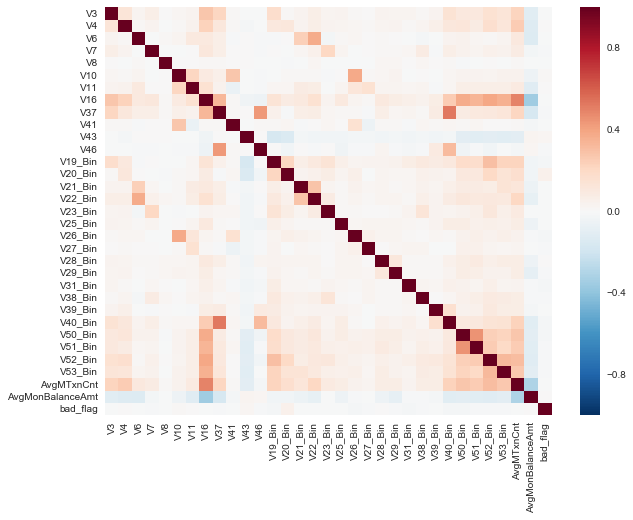

In [128]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(train_data_final_num.corr())

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


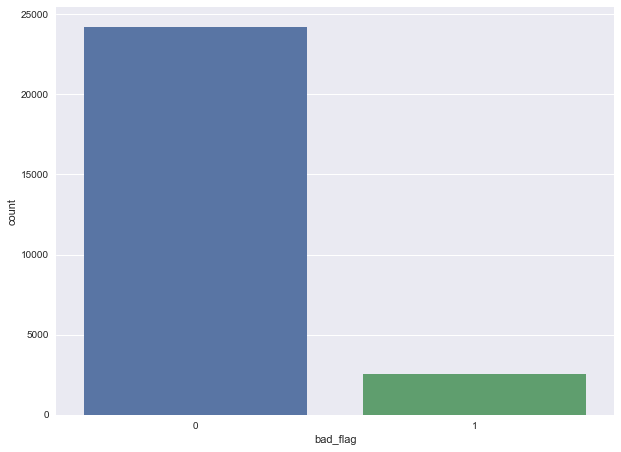

In [133]:
#Check bad_flag response variable for distribution
sns.countplot(train_data_final['bad_flag'])

In [144]:
count_no_badflag = len(train_data_final[train_data_final['bad_flag']==0])
count_badflag = len(train_data_final[train_data_final['bad_flag']==1])
pct_of_no_badflag = count_no_badflag/(count_no_badflag+count_badflag)
print("percentage of no bad flag is", pct_of_no_badflag*100)
pct_of_badflag = count_badflag/(count_no_badflag+count_badflag)
print("percentage of bad flag", pct_of_badflag*100)

percentage of no bad flag is 90.5060690943044
percentage of bad flag 9.493930905695612


In [145]:
train_data_final_os=train_data_final.drop(['UID','V1','V2'],axis=1)

In [147]:
train_data_final_os.head()

,V3,V4,V6,V7,V8,V10,V11,V16,V37,V41,...,V32_Bin_1,V32_Bin_2,V32_Bin_3,V33_Bin_0,V33_Bin_1,V33_Bin_2,V33_Bin_3,AvgMTxnCnt,AvgMonBalanceAmt,bad_flag
0,10397.750000,3008.654726,358691.120083,14641.803902,852276.268235,197186.680000,82750.418893,1548544.10,87170.000000,24.104107,...,0,0,1,0,0,0,1,47,-191682.068889,0
1,136493.078565,606.740000,358691.120083,14641.803902,852276.268235,438389.277171,82750.418893,80820.81,343141.868693,24.104107,...,0,1,0,0,1,0,0,6,2874.148333,0
2,87452.890000,963.520000,358691.120083,13838.000000,852276.268235,1081.250000,6000.000000,1076394.14,343141.868693,0.180210,...,0,0,1,0,0,0,1,32,-174057.320000,0
3,136493.078565,393.260000,358691.120083,14641.803902,852276.268235,438389.277171,82750.418893,61815.28,343141.868693,24.104107,...,1,0,0,0,1,0,0,4,-17427.596364,0
4,1100.000000,497.200000,358691.120083,14641.803902,852276.268235,18640.000000,82750.418893,1326452.17,60.900000,24.104107,...,0,0,1,0,0,0,1,22,-128131.985000,0


In [148]:
#From above,we can see that the classes are highly imbalanced with ratio of no_badflag to badflag beig ~10:1. We need to balance
#the classes.
#We will use Over-sampling using SMOTE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [149]:
X = train_data_final_os.loc[:, train_data_final_os.columns != 'bad_flag']
y = train_data_final_os.loc[:, train_data_final_os.columns == 'bad_flag']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['bad_flag'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no badflag in oversampled data",len(os_data_y[os_data_y['bad_flag']==0]))
print("Number of badflag ",len(os_data_y[os_data_y['bad_flag']==1]))
print("Proportion of no badflag data in oversampled data is ",len(os_data_y[os_data_y['bad_flag']==0])/len(os_data_X))
print("Proportion of badflag data in oversampled data is ",len(os_data_y[os_data_y['bad_flag']==1])/len(os_data_X))

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  33896
Number of no badflag in oversampled data 16948
Number of badflag  16948
Proportion of no badflag data in oversampled data is  0.5
Proportion of badflag data in oversampled data is  0.5


Now we have a perfect balanced data.Over-sampling was carried only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

In [150]:
#Recursive Feature Elimination
data_final_vars=train_data_final_os.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
  True  True False False False False  True  True False  True  True  True
 False  True False False False False  True False False False  True False
 False False False False]
[16 15 19 14 18 21 20 23 17 13 11 10  1  1 26 24 28 31  1  1 27  1  1  1
 30  1  2  8  7  9  1 25  6  5  1  3  4 29 12 22]


In [151]:
train_data_final_os.columns.values

array(['V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V11', 'V16', 'V37', 'V41',
       'V43', 'V46', 'V19_Bin', 'V20_Bin', 'V21_Bin', 'V22_Bin',
       'V23_Bin', 'V25_Bin', 'V26_Bin', 'V27_Bin', 'V28_Bin', 'V29_Bin',
       'V31_Bin', 'V38_Bin', 'V39_Bin', 'V40_Bin', 'V50_Bin', 'V51_Bin',
       'V52_Bin', 'V53_Bin', 'V32_Bin_0', 'V32_Bin_1', 'V32_Bin_2',
       'V32_Bin_3', 'V33_Bin_0', 'V33_Bin_1', 'V33_Bin_2', 'V33_Bin_3',
       'AvgMTxnCnt', 'AvgMonBalanceAmt', 'bad_flag'], dtype=object)

In [152]:
#Selected variables
cols_selected=['V19_Bin','V20_Bin','V26_Bin','V27_Bin','V29_Bin','V31_Bin','V38_Bin','V40_Bin','V32_Bin_0','V33_Bin_0']
X=os_data_X[cols_selected]
y=os_data_y['bad_flag']

In [153]:
from sklearn.metrics import accuracy_score

In [154]:
#Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     print('train_index',train_index)
     print('test_index',test_index)
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1



1 of kfold 5
train_index [    0     1     2 ... 33893 33894 33895]
test_index [    4     5     6 ... 33882 33890 33892]
accuracy_score 0.5504424778761062

2 of kfold 5
train_index [    0     1     2 ... 33892 33894 33895]
test_index [    7    12    39 ... 33888 33889 33893]
accuracy_score 0.5566371681415929

3 of kfold 5
train_index [    0     2     4 ... 33893 33894 33895]
test_index [    1     3    10 ... 33885 33886 33891]
accuracy_score 0.5492625368731563

4 of kfold 5
train_index [    0     1     2 ... 33892 33893 33894]
test_index [    8     9    13 ... 33878 33887 33895]
accuracy_score 0.5559161994688698

5 of kfold 5
train_index [    1     3     4 ... 33892 33893 33895]
test_index [    0     2    14 ... 33881 33884 33894]
accuracy_score 0.5427854824431986


In [155]:
pred=model.predict_proba(xvl)[:,1]

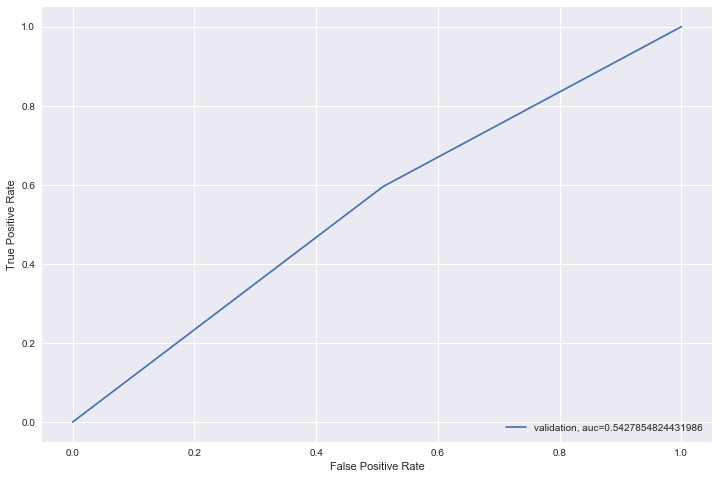

In [156]:
#Let us visualize the roc curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,pred_test)
auc = metrics.roc_auc_score(yvl, pred_test)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [157]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
#pred_test = model.predict(test_data)

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



1 of kfold 5
accuracy_score 0.8028023598820059

2 of kfold 5
accuracy_score 0.815929203539823

3 of kfold 5
accuracy_score 0.8112094395280236

4 of kfold 5
accuracy_score 0.8154322809088227

5 of kfold 5
accuracy_score 0.8138093832989083


In [ ]:
#We will try to improve the accuracy by tuning the hyperparameters for this model. 
#We will use grid search to get the optimized values of hyper parameters. 
#Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.
#We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree 
#and n_estimators decides the number of trees that will be used in random forest model

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [160]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [164]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [165]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [166]:
# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [167]:
#Try random forest and XGBoost
from xgboost import XGBClassifier

In [235]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4,metrics='aucpr')
     model.fit(xtr, ytr,eval_metric='aucpr')
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     
     i+=1


1 of kfold 5


C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy_score 0.8057522123893806

2 of kfold 5


C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy_score 0.8162241887905605

3 of kfold 5


C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy_score 0.8131268436578171

4 of kfold 5


C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy_score 0.8169076423723812

5 of kfold 5
accuracy_score 0.813956919445264


C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [230]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yvl,pred_test)
print(confusion_matrix)

[[3389    0]
 [1261 2128]]


In [232]:
# Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(yvl.values, check)
    roc_auc = auc(fpr, tpr)
    #xgb.plot_importance(gbm)
    #plt.show()
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    ##################################################

IndentationError: unexpected indent (<ipython-input-232-57d235ab7ad0>, line 2)

In [169]:
X.head()

,V19_Bin,V20_Bin,V26_Bin,V27_Bin,V29_Bin,V31_Bin,V38_Bin,V40_Bin,V32_Bin_0,V33_Bin_0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


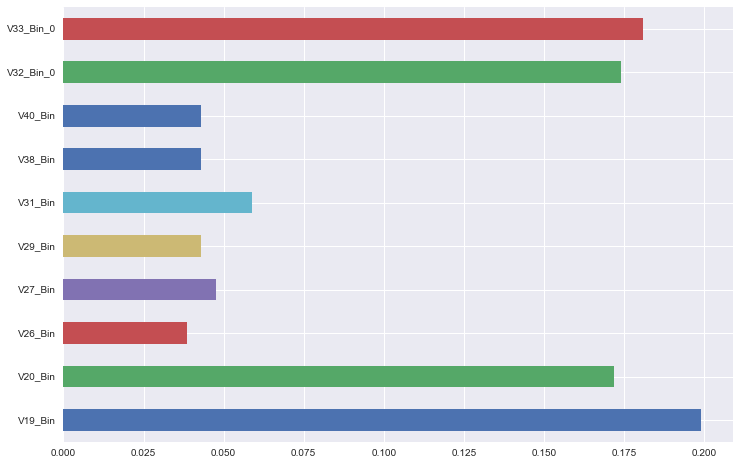

In [184]:
#Let us find the feature importance now, i.e. which features are most important for this problem. 
#We will use feature_importances_ attribute of sklearn to do so.
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [170]:
test_data_final.head()

,UID,V1,V2,V3,V4,V6,V7,V8,V10,V11,...,V32_Bin_0,V32_Bin_1,V32_Bin_2,V32_Bin_3,V33_Bin_0,V33_Bin_1,V33_Bin_2,V33_Bin_3,AvgMTxnCnt,AvgMonBalanceAmt
0,Te-1,30SEP2038,61P4S1M3GET,10397.750000,3097.780373,372364.131864,14539.785973,720291.106032,197186.680000,84646.126661,...,0,0,0,1,0,0,0,1,30,-288540.502500
1,Te-2,31JAN2038,6NYVS1J3U7M,136777.588133,606.740000,372364.131864,14539.785973,720291.106032,429745.828173,84646.126661,...,0,0,1,0,1,0,0,0,3,-3134.134167
2,Te-3,31APR2038,BLFB1KMS48,87452.890000,963.520000,372364.131864,13838.000000,720291.106032,1081.250000,6000.000000,...,0,0,0,1,0,0,0,1,23,-100465.798333
3,Te-4,31NOV2038,MYGB1LCW8P,136777.588133,393.260000,372364.131864,14539.785973,720291.106032,429745.828173,84646.126661,...,0,1,0,0,0,1,0,0,2,-48824.572222
4,Te-5,31OCT2038,6UG5S1PQGE5,1100.000000,497.200000,372364.131864,14539.785973,720291.106032,18640.000000,84646.126661,...,0,0,0,1,0,0,0,1,12,-65135.379167


In [173]:
test_data_pred=test_data_final[cols_selected]

In [183]:
test_data_pred.count()

V19_Bin      48434
V20_Bin      48434
V26_Bin      48434
V27_Bin      48434
V29_Bin      48434
V31_Bin      48434
V38_Bin      48434
V40_Bin      48434
V32_Bin_0    48434
V33_Bin_0    48434
dtype: int64

In [175]:
pred_test = model.predict(test_data)

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [182]:
len(pred_test)

48434

In [208]:
pred3=model.predict_proba(test_data)[:,1]

In [209]:
pred3[1:10]

array([0.10927702, 0.2891475 , 0.19447155, 0.40798104, 0.2891475 ,
       0.16135055, 0.10927702, 0.40798104, 0.13328172], dtype=float32)

In [187]:
pred_test[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [212]:
submission=pd.DataFrame(test_data_final)

In [220]:
submission['bad_flag']=pred_test

In [221]:
submission['bad_flag_prob']=pred3

In [222]:
submission.head()

,UID,V1,V2,V3,V4,V6,V7,V8,V10,V11,...,V32_Bin_2,V32_Bin_3,V33_Bin_0,V33_Bin_1,V33_Bin_2,V33_Bin_3,AvgMTxnCnt,AvgMonBalanceAmt,bad_flag,bad_flag_prob
0,Te-1,30SEP2038,61P4S1M3GET,10397.750000,3097.780373,372364.131864,14539.785973,720291.106032,197186.680000,84646.126661,...,0,1,0,0,0,1,30,-288540.502500,0,0.161351
1,Te-2,31JAN2038,6NYVS1J3U7M,136777.588133,606.740000,372364.131864,14539.785973,720291.106032,429745.828173,84646.126661,...,1,0,1,0,0,0,3,-3134.134167,0,0.109277
2,Te-3,31APR2038,BLFB1KMS48,87452.890000,963.520000,372364.131864,13838.000000,720291.106032,1081.250000,6000.000000,...,0,1,0,0,0,1,23,-100465.798333,0,0.289147
3,Te-4,31NOV2038,MYGB1LCW8P,136777.588133,393.260000,372364.131864,14539.785973,720291.106032,429745.828173,84646.126661,...,0,0,0,1,0,0,2,-48824.572222,0,0.194472
4,Te-5,31OCT2038,6UG5S1PQGE5,1100.000000,497.200000,372364.131864,14539.785973,720291.106032,18640.000000,84646.126661,...,0,1,0,0,0,1,12,-65135.379167,0,0.407981


In [223]:
final_submission=submission.filter(['UID','bad_flag','bad_flag_prob'],axis=1)

In [224]:
final_submission.head()

,UID,bad_flag,bad_flag_prob
0,Te-1,0,0.161351
1,Te-2,0,0.109277
2,Te-3,0,0.289147
3,Te-4,0,0.194472
4,Te-5,0,0.407981


In [227]:
pd.DataFrame(final_submission).to_csv('Final Submission.csv')

In [136]:
X = train_data_final_os.loc[:, train_data_final_os.columns != 'bad_flag']
y = train_data_final_os.loc[:, train_data_final_os.columns == 'bad_flag']

In [137]:
X=X.filter(items=['V19_Bin','V20_Bin','V26_Bin','V27_Bin','V29_Bin','V31_Bin','V38_Bin','V40_Bin','V32_Bin_0','V33_Bin_0'])

In [139]:
X.head()

,V19_Bin,V20_Bin,V26_Bin,V27_Bin,V29_Bin,V31_Bin,V38_Bin,V40_Bin,V32_Bin_0,V33_Bin_0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
#Implement the logistics model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.416529
         Iterations 8
                         Results: Logit
Model:              Logit            No. Iterations:   8.0000    
Dependent Variable: bad_flag         Pseudo R-squared: -0.327    
Date:               2018-11-21 00:45 AIC:              22325.1045
No. Observations:   26775            BIC:              22407.0567
Df Model:           9                Log-Likelihood:   -11153.   
Df Residuals:       26765            LL-Null:          -8402.5   
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
V19_Bin      -1.4169    0.0470  -30.1475  0.0000  -1.5091  -1.3248
V20_Bin      -1.4699    0.0293  -50.2483  0.0000  -1.5272  -1.4125
V26_Bin      -1.4141    0.2937   -4.8145  0.0000  -1.9897  -0

In [139]:
#Since all the variables have p < 0.05, hence all the variables are significant.
#We will now fit the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
#predict test results
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [141]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7285    0]
 [ 748    0]]


In [142]:
#Precision,Recall and Support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95      7285
          1       0.00      0.00      0.00       748

avg / total       0.82      0.91      0.86      8033



C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


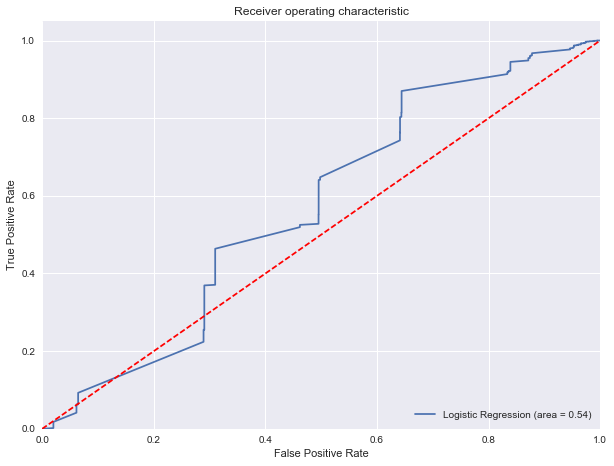

In [145]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [101]:
#3rd attempt
X = train_data_final_os.loc[:, train_data_final_os.columns != 'bad_flag']
y = train_data_final_os.loc[:, train_data_final_os.columns == 'bad_flag']

In [121]:
#We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2)

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [123]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
#Let’s predict the Loan_Status for validation set and calculate its accuracy.
pred_cv=model.predict(x_cv)

In [120]:
len(X)

26775

In [125]:
#Let us calculate how accurate our predictions are by calculating the accuracy.
accuracy_score(y_cv,pred_cv)

0.9096171802054155

In [109]:
pred=model.predict_proba(xvl)[:,1]

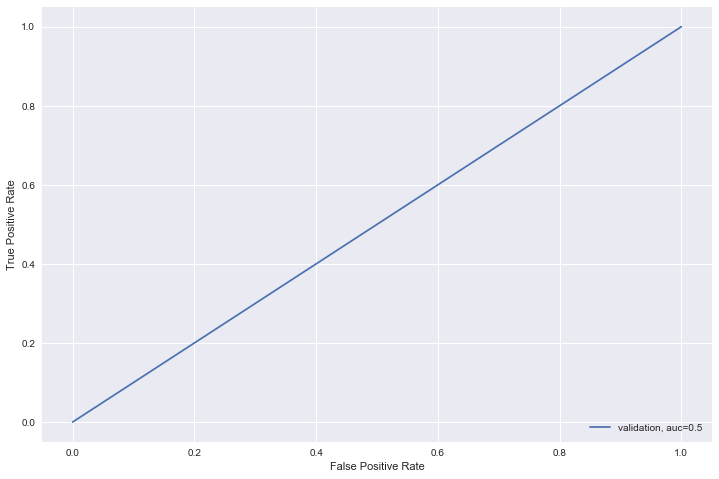

In [126]:
#Let us visualize the roc curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_cv,pred_cv)
auc = metrics.roc_auc_score(y_cv, pred_cv)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [134]:
X.count()

V3                  26775
V4                  26775
V6                  26775
V7                  26775
V8                  26775
V10                 26775
V11                 26775
V16                 26775
V37                 26775
V41                 26775
V43                 26775
V46                 26775
V19_Bin             26775
V20_Bin             26775
V21_Bin             26775
V22_Bin             26775
V23_Bin             26775
V25_Bin             26775
V26_Bin             26775
V27_Bin             26775
V28_Bin             26775
V29_Bin             26775
V31_Bin             26775
V38_Bin             26775
V39_Bin             26775
V40_Bin             26775
V50_Bin             26775
V51_Bin             26775
V52_Bin             26775
V53_Bin             26775
V32_Bin_0           26775
V32_Bin_1           26775
V32_Bin_2           26775
V32_Bin_3           26775
V33_Bin_0           26775
V33_Bin_1           26775
V33_Bin_2           26775
V33_Bin_3           26775
AvgMTxnCnt  

In [143]:
#Now let’s make a cross validation logistic model with stratified 5 folds and make predictions for test dataset
from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     print('train_index',train_index)
     print('test_index',test_index)
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1



1 of kfold 5
train_index [    1     3     5 ... 26772 26773 26774]
test_index [    0     2     4 ... 26753 26760 26761]


KeyError: '[    1     3     5 ... 26772 26773 26774] not in index'

In [147]:
#Let us visualize the roc curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [6778, 5356]

In [148]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [149]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
#pred_test = model.predict(test_data)


1 of kfold 5
accuracy_score 0.8028023598820059

2 of kfold 5
accuracy_score 0.815929203539823

3 of kfold 5
accuracy_score 0.8112094395280236

4 of kfold 5
accuracy_score 0.8154322809088227

5 of kfold 5
accuracy_score 0.8138093832989083


NameError: name 'test_data' is not defined

In [ ]:
from xgboost import XGBClassifier

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

###### 2.1 Data Exploratory Analysis, 2nd Iteration
    - Bivariate Analysis - Numeric(TTest/ANOVA) and Categorical(Chisquare)

In [250]:
## Numerical Variable - T-test
tstats_df = pd.DataFrame()
for num_variable in train_data_final_num:
    tstats = stats.ttest_ind(train_data_final[train_data_final['bad_flag']==1][num_variable],train_data_final[train_data_final['bad_flag']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

       Variable Name T-Statistic      P-Value
0                 V3   -0.545695      0.58528
1                 V4     1.05056     0.293472
2                 V6   -0.551765     0.581114
3                 V7    -1.98608    0.0470344
4                 V8   -0.413269     0.679413
5                V10     1.86779    0.0618023
6                V11    0.460656     0.645049
7                V16   -0.720142     0.471444
8                V37    -2.37213    0.0176927
9                V41   -0.394037     0.693556
10               V43     3.58904  0.000332487
11               V46     -2.3475    0.0189071
12           V19_Bin    -3.81705  0.000135358
13           V20_Bin     8.82681  1.14139e-18
14           V21_Bin   -0.683992     0.493986
15           V22_Bin    -1.20361     0.228749
16           V23_Bin   -0.584644     0.558792
17           V25_Bin   -0.263637     0.792061
18           V26_Bin    -2.59132   0.00956595
19           V27_Bin    -2.20325    0.0275856
20           V28_Bin    0.262233  

In [251]:
#keep only v19,v20,v26,v27,v31,v32,v40,v43
train_data_final_orginal=train_data_final
train_data_final_model=train_data_final
train_data_final_model=train_data_final_model[['V7','V37','V43','V46','V19_Bin','V20_Bin','V26_Bin','V27_Bin','V31_Bin','V40_Bin','V50_Bin','V51_Bin','V52_Bin','V53_Bin','bad_flag']]


###### 2.4 Data Exploratory Analysis
    - Variable Transformation: (i) Bucketing

In [252]:
train_data_final_model.head()

,V7,V37,V43,V46,V19_Bin,V20_Bin,V26_Bin,V27_Bin,V31_Bin,V40_Bin,V50_Bin,V51_Bin,V52_Bin,V53_Bin,bad_flag
0,14641.803902,87170.000000,7.473579,5.040550,1,0,0,0,0,0,1,1,0,1,0
1,14641.803902,343141.868693,0.281470,5.654328,0,0,0,0,0,0,0,0,0,0,0
2,13838.000000,343141.868693,0.089600,5.654328,1,1,0,0,0,0,1,1,1,0,0
3,14641.803902,343141.868693,0.156780,5.654328,0,0,0,0,0,0,0,0,0,0,0
4,14641.803902,60.900000,0.038360,0.004700,0,1,0,0,0,0,0,0,0,0,0


In [253]:
X=train_data_final_model.drop(['bad_flag'],axis=1)
X.head()

,V7,V37,V43,V46,V19_Bin,V20_Bin,V26_Bin,V27_Bin,V31_Bin,V40_Bin,V50_Bin,V51_Bin,V52_Bin,V53_Bin
0,14641.803902,87170.000000,7.473579,5.040550,1,0,0,0,0,0,1,1,0,1
1,14641.803902,343141.868693,0.281470,5.654328,0,0,0,0,0,0,0,0,0,0
2,13838.000000,343141.868693,0.089600,5.654328,1,1,0,0,0,0,1,1,1,0
3,14641.803902,343141.868693,0.156780,5.654328,0,0,0,0,0,0,0,0,0,0
4,14641.803902,60.900000,0.038360,0.004700,0,1,0,0,0,0,0,0,0,0


In [254]:
y=train_data_final_model.loc[:,train_data_final_model.columns=='bad_flag']
y.head()

,bad_flag
0,0
1,0
2,0
3,0
4,0


In [255]:
#We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [256]:
#The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.
x_cv.head()


,V7,V37,V43,V46,V19_Bin,V20_Bin,V26_Bin,V27_Bin,V31_Bin,V40_Bin,V50_Bin,V51_Bin,V52_Bin,V53_Bin
24425,14641.803902,343141.868693,2.475460,5.654328,0,0,0,0,0,0,0,0,0,0
26132,14641.803902,343141.868693,0.001850,5.654328,1,1,0,0,0,0,0,0,0,0
25199,14641.803902,343141.868693,7.473579,5.654328,0,0,0,0,0,0,0,0,0,0
7701,14641.803902,343141.868693,0.014100,5.654328,1,1,0,0,0,0,1,0,0,1
3981,14641.803902,343141.868693,0.021550,5.654328,0,1,0,0,0,0,0,0,0,0


In [528]:
x_train.count()

V19    18742
V20    18742
V26    18742
V27    18742
V31    18742
V32    18742
V40    18742
V43    18742
dtype: int64

In [529]:
y_train.describe()

,bad_flag
count,18742.000000
mean,0.096414
std,0.295167
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  if multi_class not in ['multinomial', 'ovr']:
C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Raises


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [266]:
#predict test results
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [258]:
model=LogisticRegression()

In [264]:
model.fit=(x_train,y_train)

In [260]:
x_train.isnull().sum().sum()

0

In [261]:
model.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [262]:
model.predict

<bound method LogisticRegression.predict_proba of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [263]:
#Let’s predict the bad_flag_Status for validation set and calculate its accuracy.
pred_cv=model.predict_proba(x_cv)

NotFittedError: Call fit before prediction

In [ ]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in bankloans_existing.columns.difference(['default']):
    binned = pd.cut(bankloans_existing[num_variable], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    ser = bankloans_existing.groupby(binned)['default'].sum() / (bankloans_existing.groupby(binned)['default'].count()-bankloans_existing.groupby(binned)['default'].sum())
    ser = np.log(ser)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [ ]:
print('These variables need bucketing - creddebt, othdebt, debtinc, employ, income ')
bankloans_existing.columns

In [ ]:
bankloans_existing[['creddebt', 'othdebt', 'debtinc', 'employ','income' ]].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

In [ ]:
#bucekting
#bankloans_existing['creddebt_extreme'] = bankloans_existing['creddebt'].apply(lambda x: 0 if 162 < x < 221 else 1)
#bankloans_existing['othdebt_extreme'] = bankloans_existing['othdebt'].apply(lambda x: 0 if 0.6 <= x < 0.84 else 1)
#bankloans_existing['debtinc_extreme'] = bankloans_existing['debtinc'].apply(lambda x: 0 if 0.6 <= x < 0.84 else 1)
#bankloans_existing['debtinc_extreme'].value_counts()

###### 2.5 Data Exploratory Analysis
    - Variable Reduction using Somer's D values

In [443]:

somersd_df = pd.DataFrame()
for num_variable in train_data_final_num.columns.difference(['bad_flag']):
    logreg = sm.logit(formula = str('bad_flag ~ ')+str(num_variable), data=train_data_final_num)
    print(logreg)
    result = logreg.fit()
    summ = result.summary2()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(train_data_final_num['bad_flag'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)



Optimization terminated successfully.
         Current function value: 0.313818
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.313773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.313809
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.313738
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.312230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.313759
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.313760
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.313769
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.313819
         Iterations 6


LinAlgError: Singular matrix

In [447]:
## Variance Inflation Factor assessment
X = train_data_final
features = "+".join(X.columns.difference(['bad_flag']))
X.head()

,UID,V1,V2,V4,V16,V19,V20,V21,V22,V23,...,V34,V38,V39,V40,V43,V51,V53,TxnCount,BalanceAmt,bad_flag
0,Tr-1,30SEP2038,61P4S1M3GET,3008.654726,1548544.10,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,7.473579,9.000000,10.00000,427,98236.28,0.0
1,Tr-2,31JAN2038,6NYVS1J3U7M,606.740000,80820.81,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.281470,6.356078,7.27581,78,-39505.06,0.0
2,Tr-3,31APR2038,BLFB1KMS48,963.520000,1076394.14,32.0,21.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.089600,10.000000,1.00000,128,46622.60,0.0
3,Tr-4,31NOV2038,MYGB1LCW8P,393.260000,61815.28,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.156780,1.000000,2.00000,41,106036.92,0.0
4,Tr-5,31OCT2038,6UG5S1PQGE5,497.200000,1326452.17,1.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.038360,3.000000,2.00000,216,-503462.47,0.0


In [448]:
features

'BalanceAmt+TxnCount+UID+V1+V16+V19+V2+V20+V21+V22+V23+V24+V25+V26+V27+V28+V29+V30+V31+V32+V33+V34+V38+V39+V4+V40+V43+V51+V53'

In [450]:
a,b = dmatrices(formula_like='bad_flag ~ '+ 'BalanceAmt+TxnCount+V1+V16+V19+V2+V20+V21+V22+V23+V24+V25+V26+V27+V28+V29+V30+V31+V32+V33+V34+V38+V39+V4+V40+V43+V51+V53'
, data = X, return_type='dataframe')



MemoryError: 

In [ ]:
#Train and Test split

train_features = X.columns.difference(['default'])
train_X, test_X = train_test_split(X, test_size=0.3, random_state=42)
train_X.columns

In [ ]:
logreg = sm.logit(formula='default ~ ' + "+".join(train_features), data=train_X)
result = logreg.fit()

In [ ]:
dir(result)

In [ ]:
logreg = sm.logit(formula='default ~ address+debtinc+employ+othdebt' , data=train_X)
result = logreg.fit()

In [ ]:
 result.summary2()

In [ ]:
train_gini = 2*metrics.roc_auc_score(train_X['default'], result.predict()) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_X['default'], result.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

In [ ]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train_X))
train_predicted_prob.columns = ['prob']
train_actual = train_X['default']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

In [ ]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test_X))
test_predicted_prob.columns = ['prob']
test_actual = test_X['default']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

In [ ]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [ ]:
roc_like_df

In [ ]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], 1-roc_like_df['specificity'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

In [ ]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [ ]:
roc_like_df

In [ ]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

In [ ]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.29 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.29 else 0)
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()
# (117+236)/(117+236+120+17)

In [ ]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

In [ ]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)
#test['Deciles']=pd.qcut(test['prob'],10, labels=False)
train_predict.head()

In [ ]:
df = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)

In [ ]:
df

In [ ]:
train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)

In [ ]:
new_cust_prob = pd.DataFrame(result.predict(bankloans_new))


new_cust_prob.columns = ['prob1']

bankloans_new1=pd.concat([bankloans_new, new_cust_prob.prob1], axis=1)

In [ ]:
new_cust_prob.head(5)

In [ ]:
bankloans_new1.head()

In [ ]:
bankloans_new1['predicted'] = bankloans_new1['prob1'].apply(lambda x: 1 if x > 0.29 else 0)

In [ ]:
bankloans_new1.head()

In [ ]:
# Decision Trees
import sklearn.tree as dt
import sklearn.ensemble as en

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

In [ ]:
X.columns

In [ ]:
features = X.columns.difference(['default'])
features

In [ ]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( X[features],
                                                  X['default'],
                                                  test_size = 0.7,
                                                  random_state = 142 )

In [ ]:
clf_tree = DecisionTreeClassifier( max_depth = 3 )
clf_tree.fit( train_X, train_y )

In [ ]:
dir(clf_tree)

In [ ]:
pd.DataFrame(clf_tree.predict_proba(train_X))

In [ ]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_X ) } )

In [ ]:
tree_train_pred.head(10)

In [ ]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [ ]:
tree_test_pred.head(10)

In [ ]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

In [ ]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

In [ ]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True, fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#Fine Tuning the parameters
param_grid = {'max_depth': np.arange(3, 12)}

In [ ]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

In [ ]:
tree.best_params_

In [ ]:
tree.best_score_

In [ ]:
#Building Final Decision Tree Model
train_X.head()

In [ ]:
clf_tree = DecisionTreeClassifier( max_depth = 5 )
clf_tree.fit( train_X, train_y )

In [ ]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [ ]:
tree_test_pred.sample( n = 10 )

In [ ]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

In [ ]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#Generate Rules from Decision Trees
#To create a decision tree visualization graph.
#Install GraphViz (As per the OS and version you are using)
#pip install pydotplus
#Add the path to environmental variables
#Note: The notebook needs a restart.

In [ ]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
export_graphviz( clf_tree,
              out_file = "hr_tree.odt",
              feature_names = train_X.columns )

In [ ]:
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'hr_tree.odt' )

In [ ]:
chd_tree_graph.write_jpg( 'hr_tree.jpg' )

In [ ]:
from IPython.display import Image
Image(filename='hr_tree.jpg')